<a href="https://colab.research.google.com/github/Loic6834568/Cosc_3P99/blob/main/Cosc_3P99_Loic_wedji_6834568_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a graph?
A **graph** can be simply summarized as a set of vertices(nodes) and edges, where edges are between each node.

***G=(V,E)***

***V (or V(G)) is a set of vertices***

***E (or E(G)) is a set of edges***

A graph can represent as an **adjacency matrix**, where each nodes indexes a particular row and column, and where edges are represented as entries in the matrix.

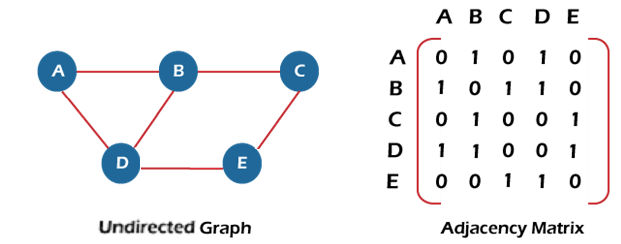

*Adjacency matrix. from Wolfram MathWorld. (n.d.)*



If our graph contains only undirected edges, it is referred as a **symmetric matrix**, however if it is not the case then it will not necessarily be symmetric. Some graphs contain **weighted edges**, where our entries in our matrix are represented as numbers (based on the weight).

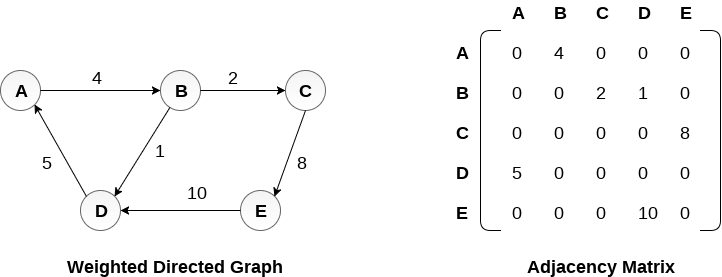

*Graph representation - adjacency matrix and linked list.(n.d)*

##Feature Information
A graph can contain *features* or *attributes* associated with nodes. These **Node level attributes** can also be represented in an adjacency matrix.

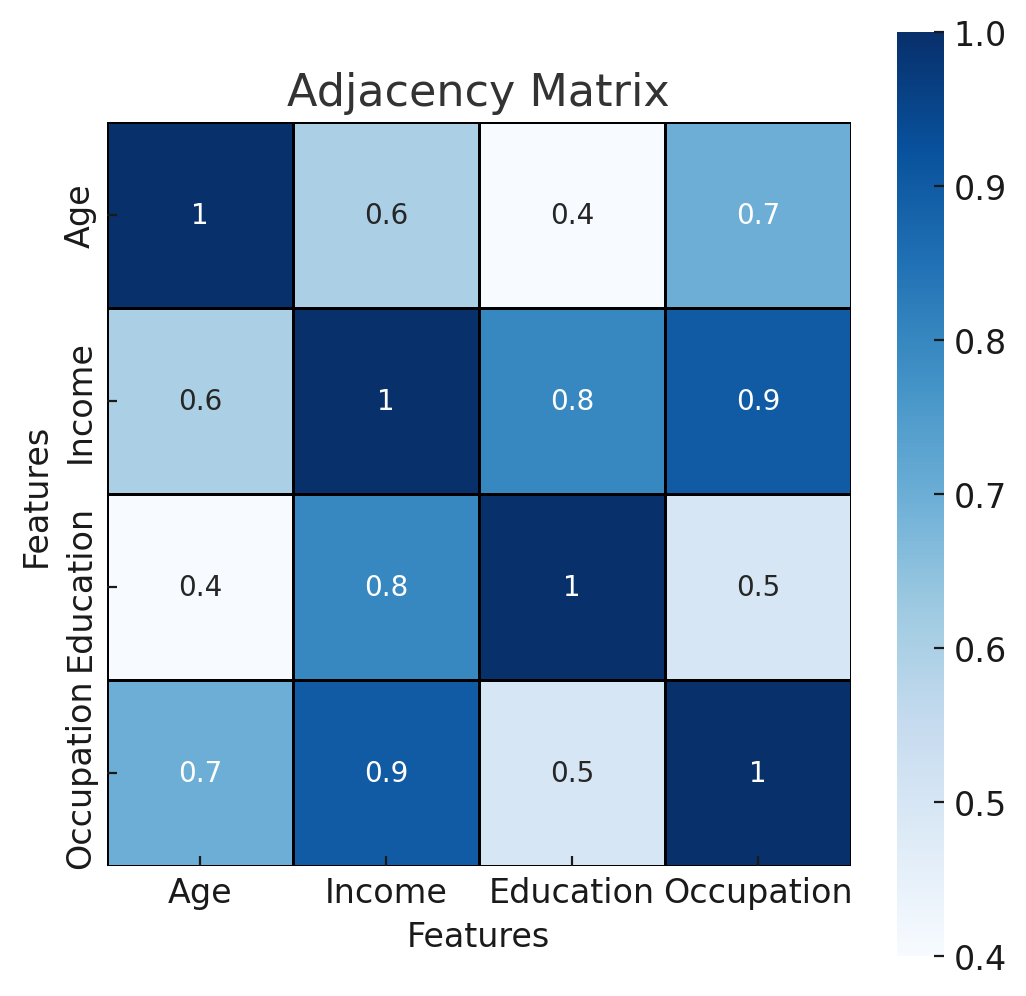

*(OpenAI,2023)*


Sometimes graphs can have nodes imbued with types which can be separated into different sets. Edges can have specific constraints which may only be used with a specific type of nodes. This graph is referred as a **heterogeneous graph**. In a heterogeneous graph, it is assumed that distinct types of nodes can come with their own features, in some cases graphs can have real valued edges in addition to discrete edges.




#Node Classification
Machine learning is a tool used for problem-solving and completed specific tasks, usually these task fall into two common categories: An *supervised* task, where we try to predict an output given by the input data or a *unsupervised* task, where try to learn patterns based on a volume of data provided. When classifying nodes, we predict whether a node falls into type, category, or attribute by labeling it. It is quite often common to conclude that label information targets a small subset of nodes in our graphs, however it is still possible for it to be applied on many nodes especially the generalization across disconnected graphs. The nodes in a graph are not *independent* or *identically distributed*, we are trying to leverage the interconnection between each node. One way to effectively way is to exploit ***homophily***, it is the tendency for nodes to share similar attributes to their neighbors. Based on the similarity of between certain nodes we can create a connection on those who match and try to assign similar labels to them.

#Supervised or Semi-Supervised?
During the training stages of our node classification, we usually have access to the entire graph, which includes labeled and unlabelled nodes (test nodes). In a supervised setting we focus our training more on the labeled nodes, whereas in a **semi-supervised** our model will train labeled and unlabeled data points.

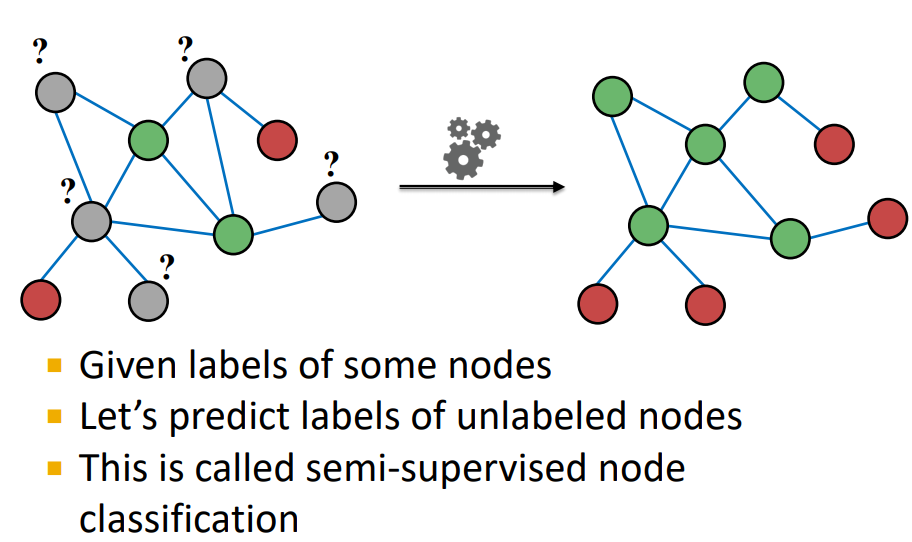


#Why are we studying Graph Neural Networks (GNNs)?
As uncommon as the topic is to the general public, GNNs are systems we use everyday in our daily lives yet we don't recognize it. The idea where we build a machine learning model that uses data that is structured in a graph correctly defines ***Graph Neural Networks***. When we use our Googgle maps or search for recommended titles on netflix or social networks, these systems are grounded in the concept of GNNs. GNNs are currently being used to discover novel potent anitbiotics and they have even helped mathematicians to uncover the hidden structure of mathetimatical objects. These are crucial things that effect our daily lives yet we don't notice how complex a simple task such as using Google maps or netflix can be. Researching or studying GNN allows us to find optimal ways to improve our lives and make complex task trivial to the average user.

#Graph Neural Network
GNNs is a class of deep Learning Network that works on graph data, yet it can be split up in major categories:

- **Convolutional**
 Convolutional GNNs include: the Chebyshev network, graph convolutional network (GCN) and the simplified graph convolution (SGC).
- **Attentional**
 Attentional GNNs include: the mixture model CNN, graph attention network (GAT), and its variant "v2"(GATv2).
- **Message-Passing**
Message-Passing GNNs include: interaction networks,message passing neural networks (MPNN), graph networks(GN).

As we reviewed earlier, Node classification and Label Propagation (which we will discuss below) are tasks that can be solved using GNNs.
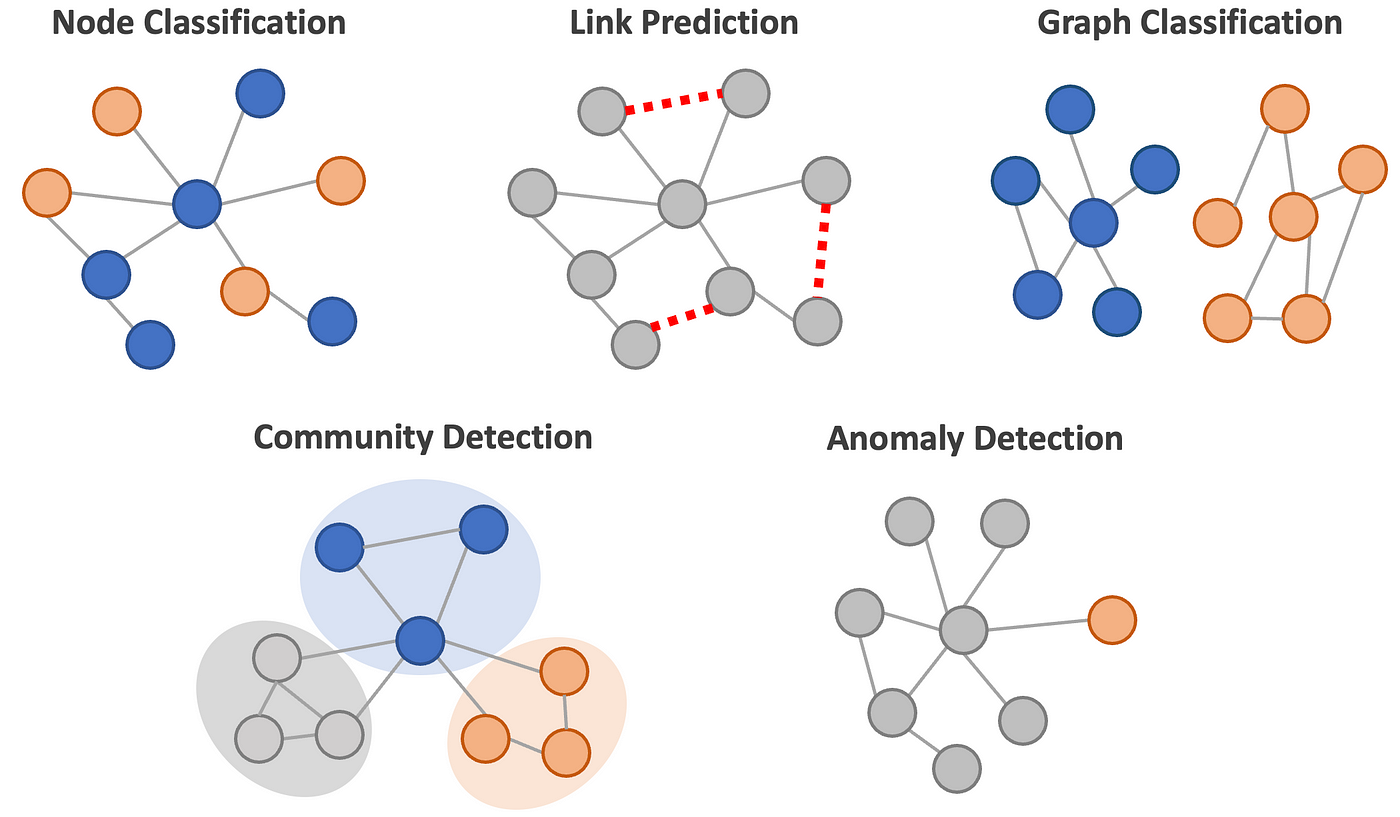

## Label Propagation
To explain the concept of **Label propagation**, we will use a fraud detection task as an example. The idea is that each account is created and associated with a credit card, some share the same credit card as well as IP address. If an account node is considered fraudulent, we can draft a conclusion on whether an IP address is fraudulent or is at risk of fraudulent accounts. However, if we have an IP address that holds good accounts but one of those account is tided with a credit card that holds multiple fraudulent accounts, there would be no way to identify that from our current IP address since most of our accounts from our aggregations are in good stating. This is where the creator introduced label propagation, the idea is that every fraud accounts in the graph would send fraud signals and good accounts would send good signals. These signals would travel all around the graph, which would enable each node or rather IP address to be aware of the potential risk of fraudulent accounts based on its direct connections (Labels).

Here's a more visual approach: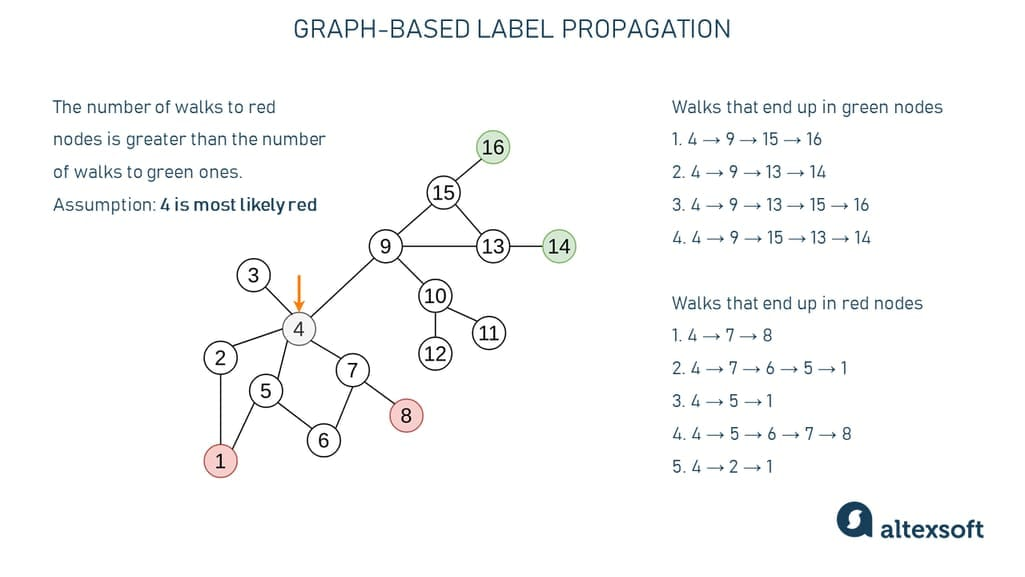

*AltexSoft. (2024, March 29)*

## Graph Convolutional Network
Similar to label propagation instead of passing values about the label, GCN are similar messaging system that passes values about the feature input.
The GCN model defines the message passing function as:
$$\mathbf{h}_u^{(k)} = \sigma \left( \mathbf{W}^{(k)} \sum_{v \in \mathcal{N}(u) \cup \{u\}} \frac{\mathbf{h}_v}{\sqrt{|\mathcal{N}(u)| |\mathcal{N}(v)|}} \right)
$$

 Each nodes collect feature input from its neighbors and is passed through some sort of aggregation function and a neural network to provide an output, this concept is called a **GCN layer**.
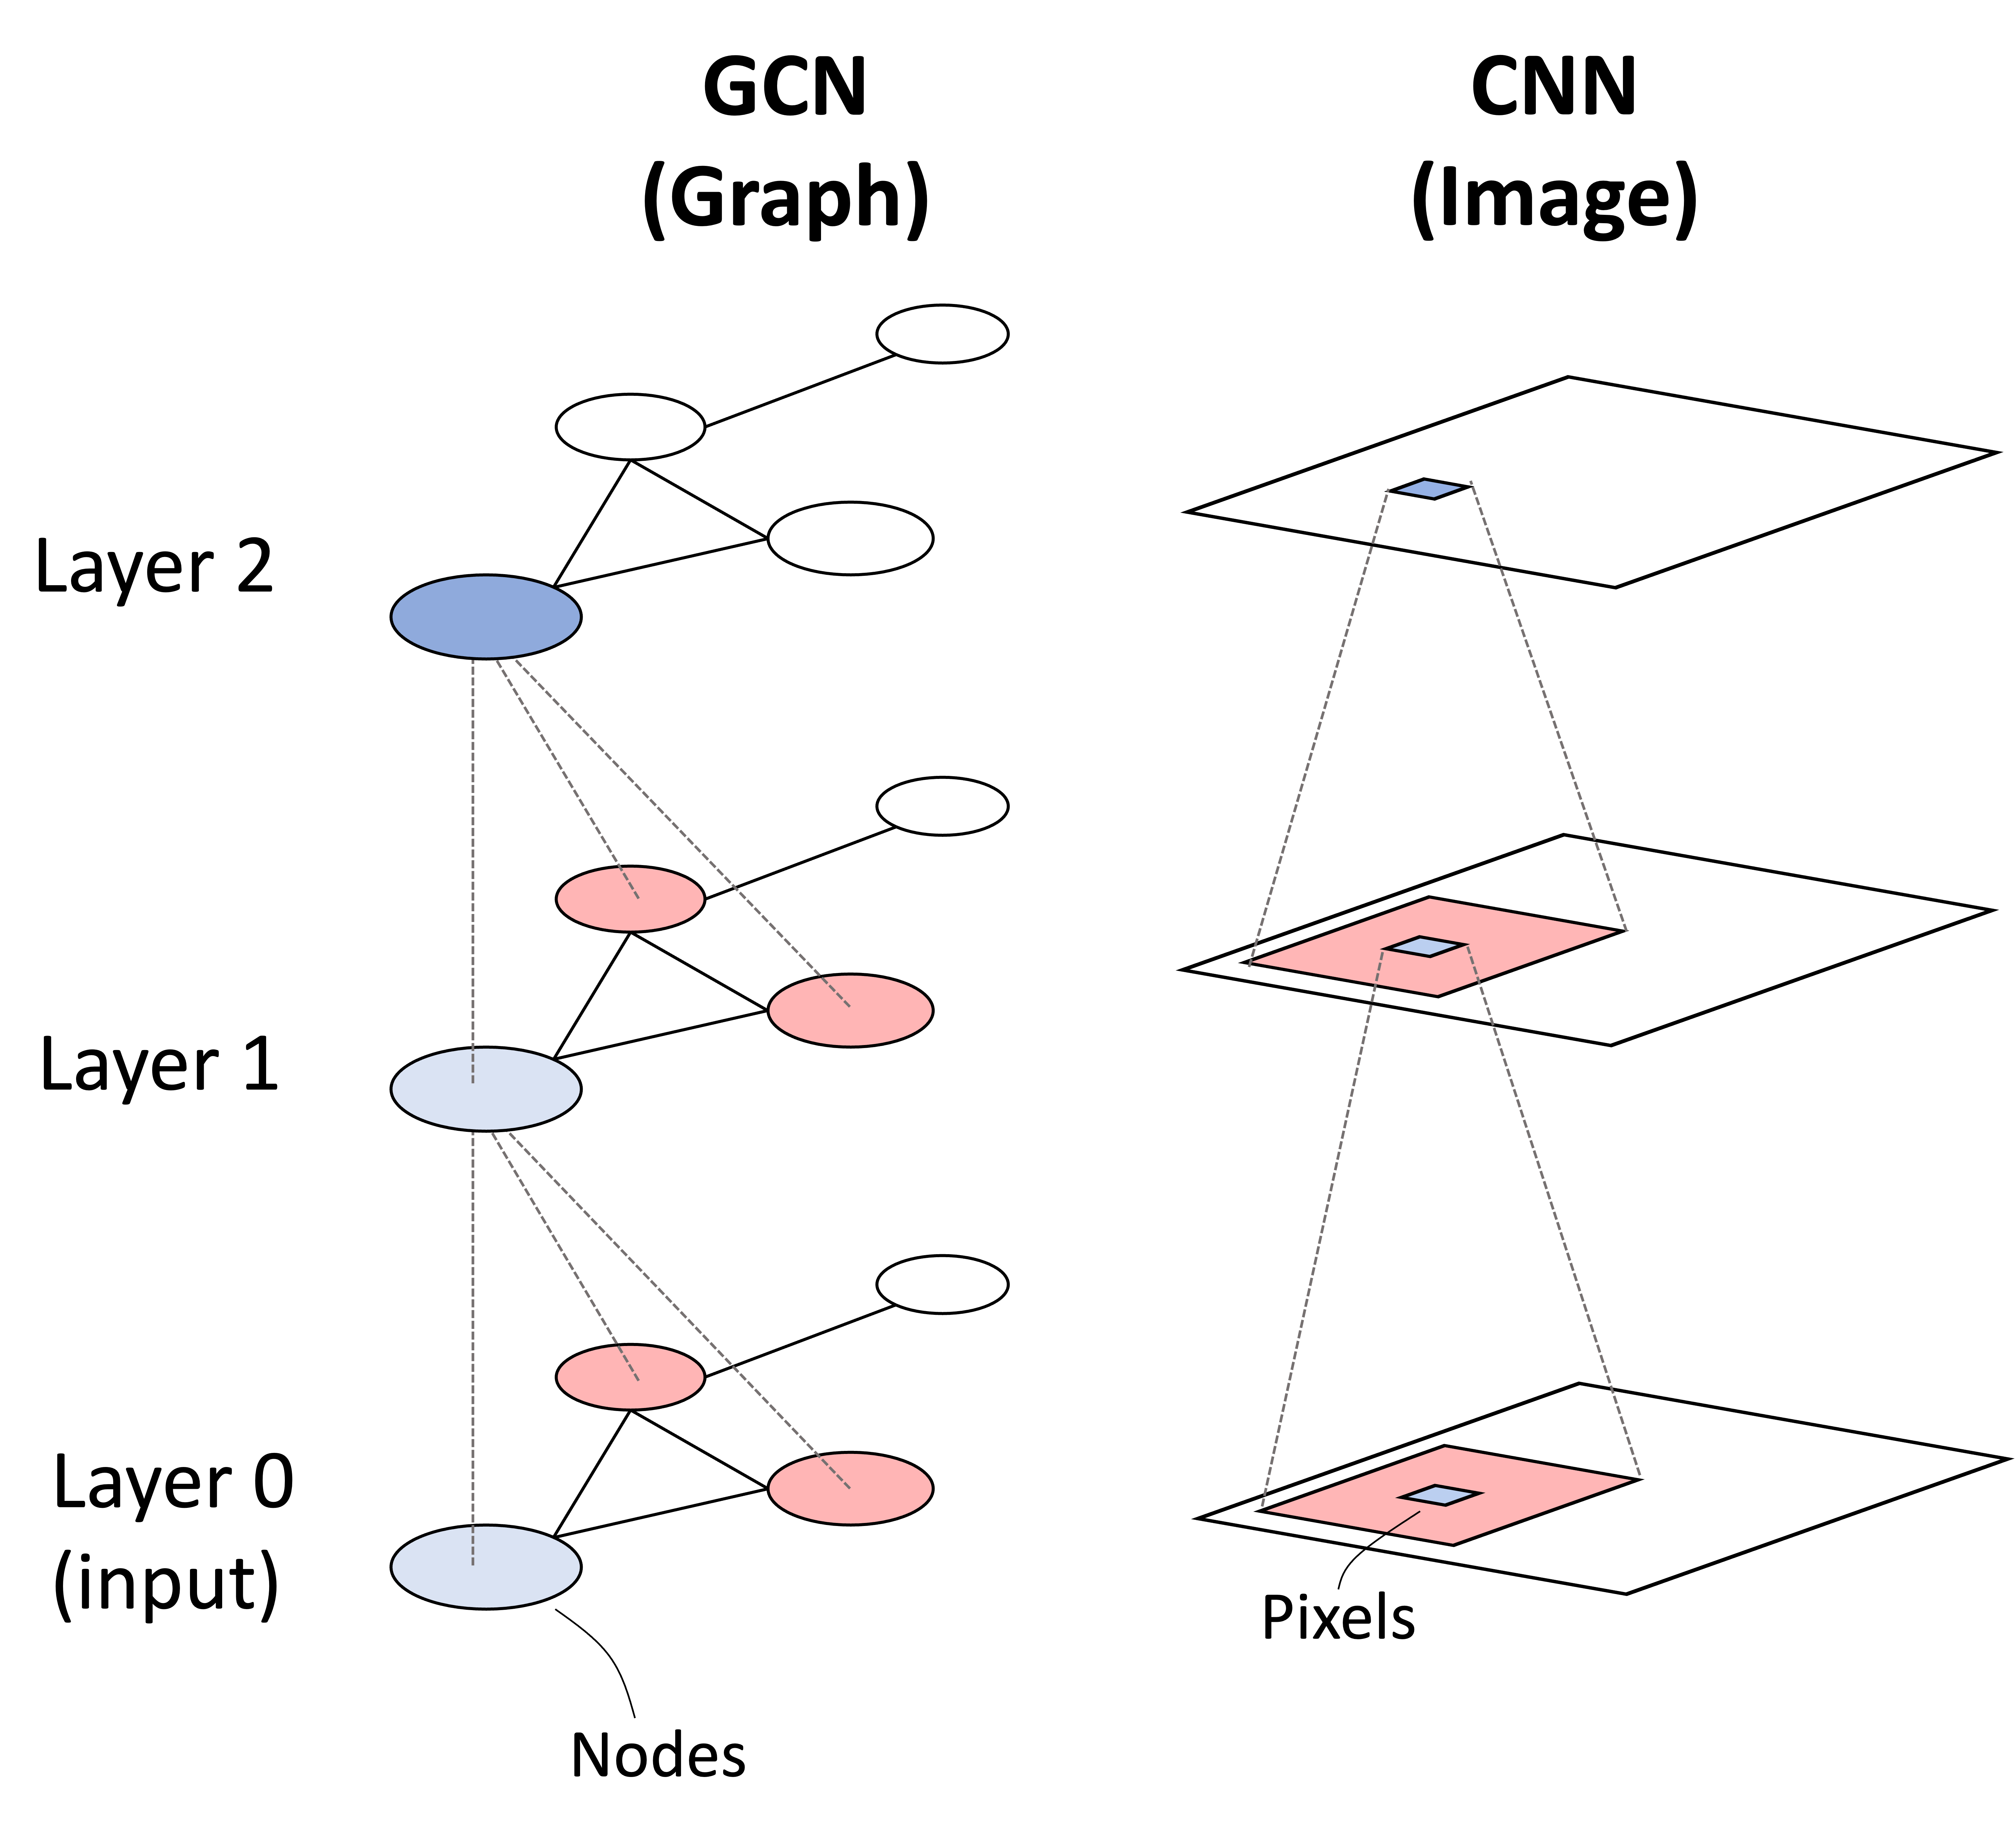




##Lets see how it's set up!

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

!git clone https://github.com/pmaldonado/cs224w-project-data.git
# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# This method's purpose is to create a visual representation of our graph
def visualize_graph(G, color):
    plt.figure(figsize=(7,7)) #create a canvas for our graph
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2") #we create a network and draw it in our graph
    plt.show() # show our graph


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

2.4.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Cloning into 'cs224w-project-data'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53 (from 1)
Receiving objects: 100% (53/53), 15.02 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (14/14), done.


# Karate Club
This is where we collect our karate club dataset which will also list the number of graphs, features and classes.

In [ ]:
from torch_geometric.datasets import KarateClub # we import dataset from karateclub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


We expand more on this by outputing the number of nodes, edges, average node degree, training node etc...

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Nodes  | # of edges  | # of Classes  |
|---|---|---|---|
| Karate Club  | 34  | 156   | 4  |

##Visualization of our Karate Club
This is now the output of our current graph.

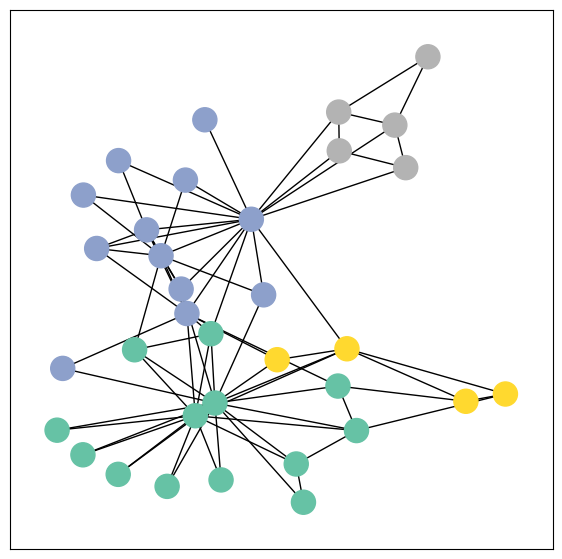

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

##GCN + relu Karate Club

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        #just as the image above we will add two disctinct graph conventional layers to our GCN
        self.conv1 = GCNConv(dataset.num_features, 4)#This layer has 2 parameters where one takes number of input features for each node in the graph
        #and the second input is the number of output features for each node with this layer.
        self.conv2 = GCNConv(4, 2)#The second layer select 4 input features for each node after the first layer and outputs 2 features for each node after this layer.
        self.classifier = Linear(2, dataset.num_classes) #This creates a linear layer the maps node embeddings from the previous layer (2) and outputs the number of classes.

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


##Embedding the Karate Club Network

Embedding shape: [34, 2]


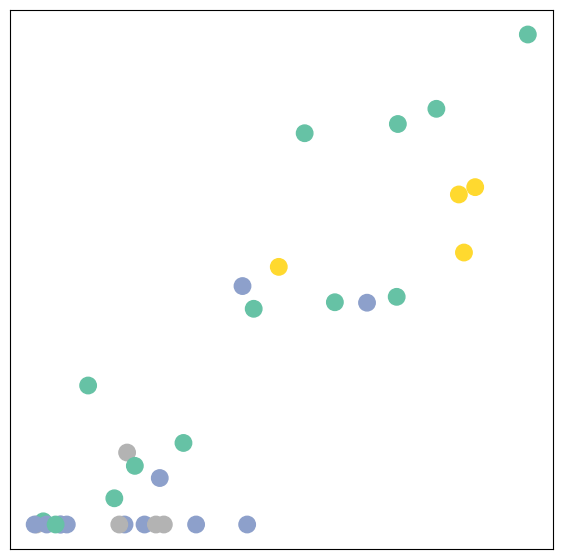

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

##Training on the Karate Club Network
We talked earlier about semi-supervised models where we leverage labeled and unlabeled nodes. In this instance below we would only be taking the training nodes, purely because of that. Using those training nodes, we expect our model to produce and output similar results to our target value.

However it is possible for our model to produce results that are not our exact target value. To calculate the error between the produced output and our target value, is precisely what defines a **loss Function** or **loss Criterion**.
Specifically for our GCN model, our loss function we would use is **Cross Entropy Loss**.

**Cross Entropy Loss** calculates the difference between the probability of our sample label and the true label. For example, if we are given a picture of a dog and our classes ranges from dog, cat and lizard. Our true label would be a dog and its probability would be 1.00. Say our model predicts a probability of 85% dog, 10% cat and 5% lizard. The difference between our true label (1.00) and our predicted label (0.85) is our Cross entropy Loss in which for this case would 15%. In order to minimize the loss Function, there are different tools that can acheive that such as **optimizers**. Below you will see as we utilize both of them to acheive a precise and accurate prediction.

<IPython.core.display.Javascript object>

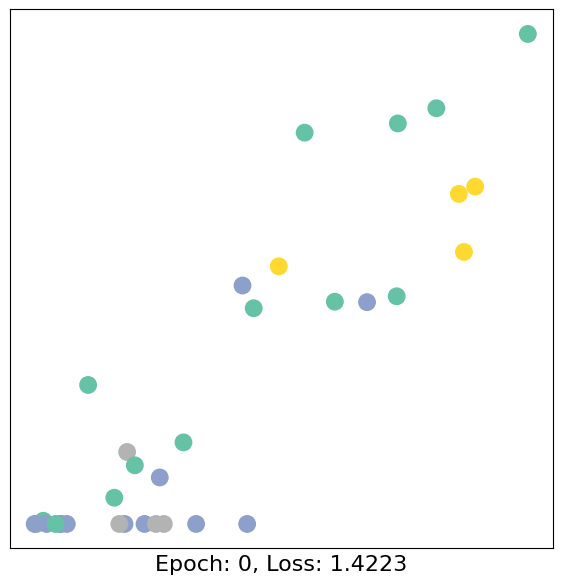

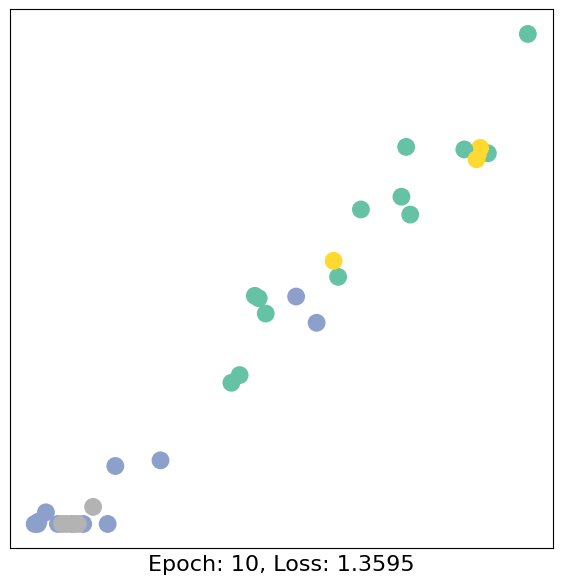

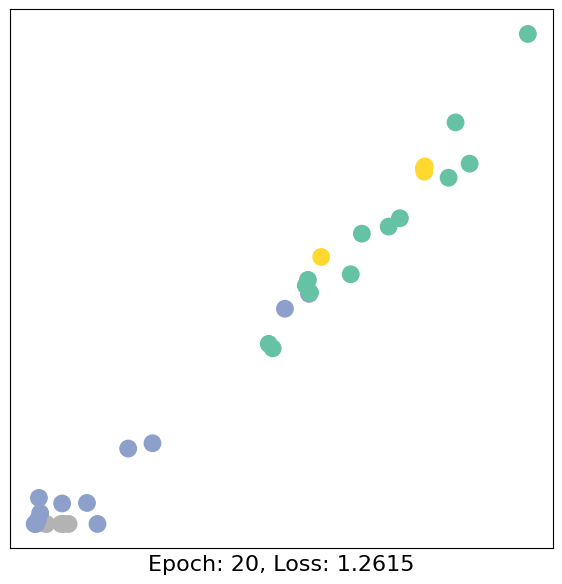

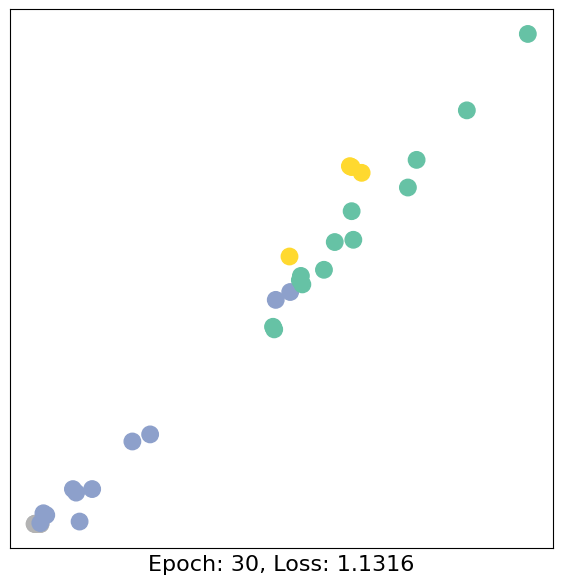

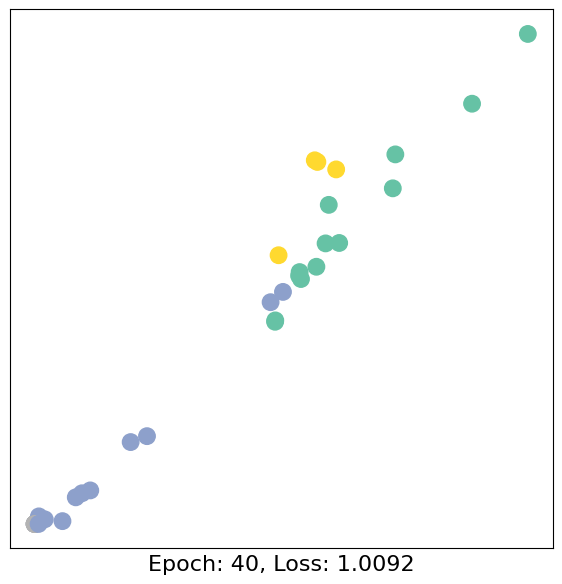

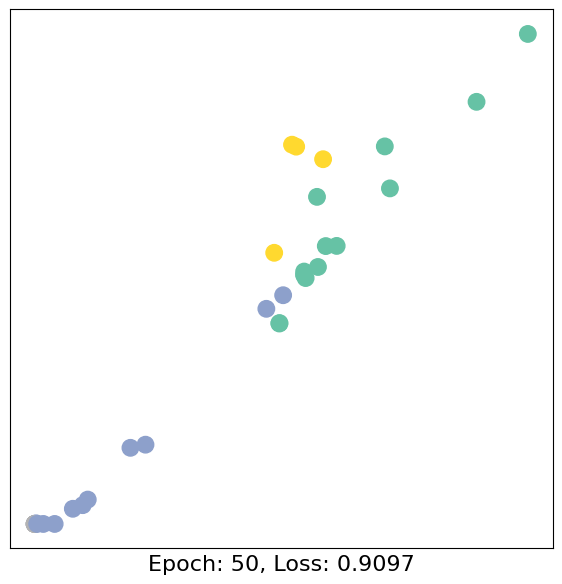

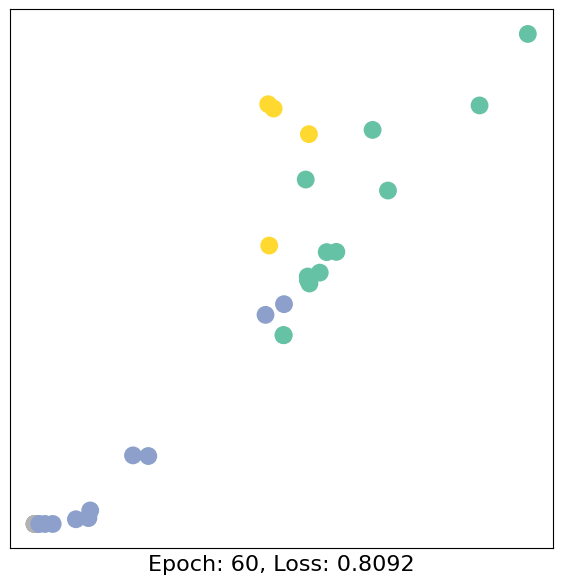

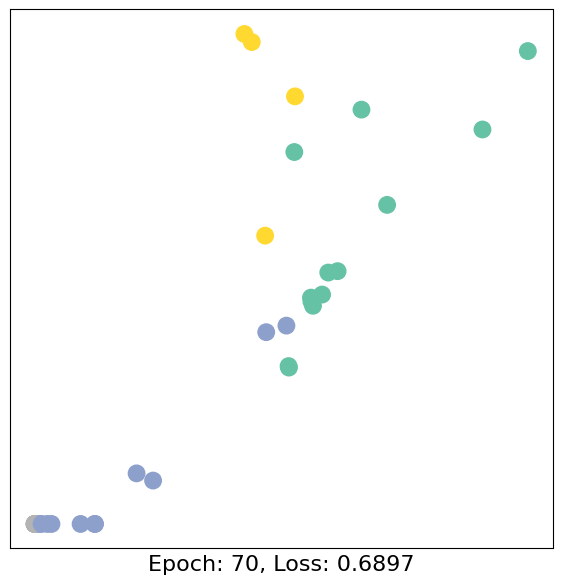

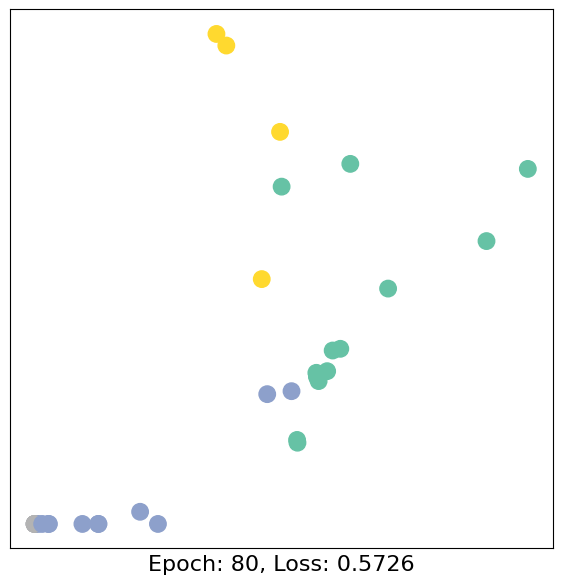

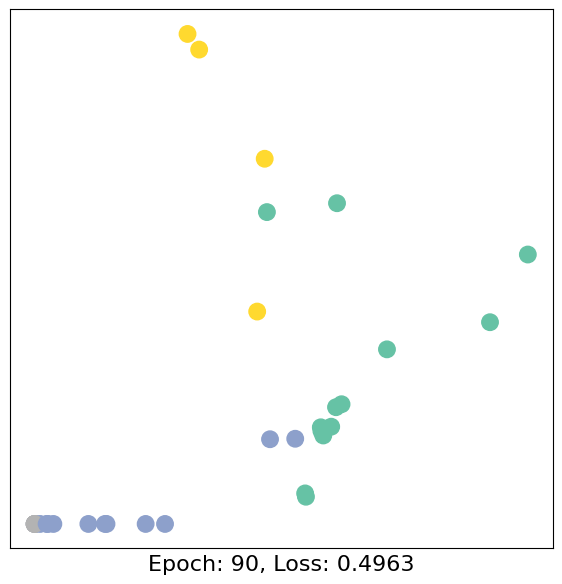

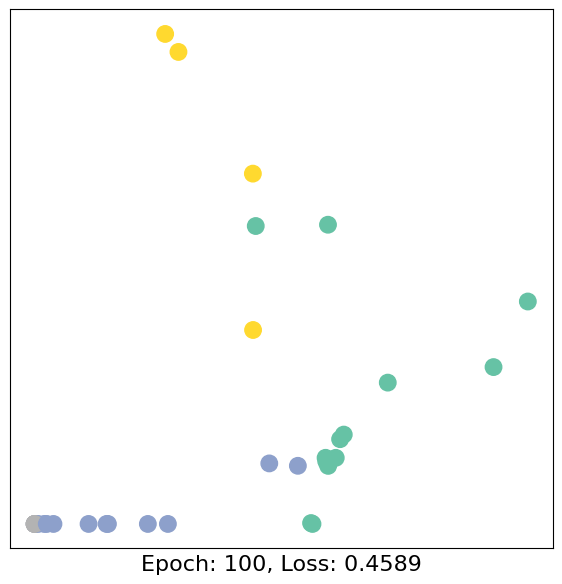

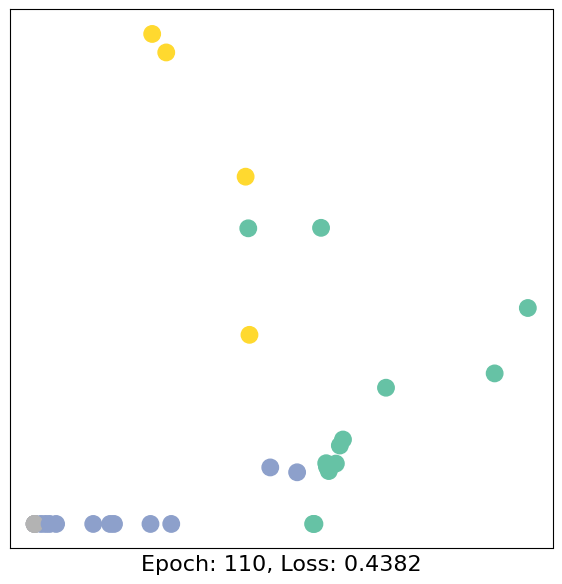

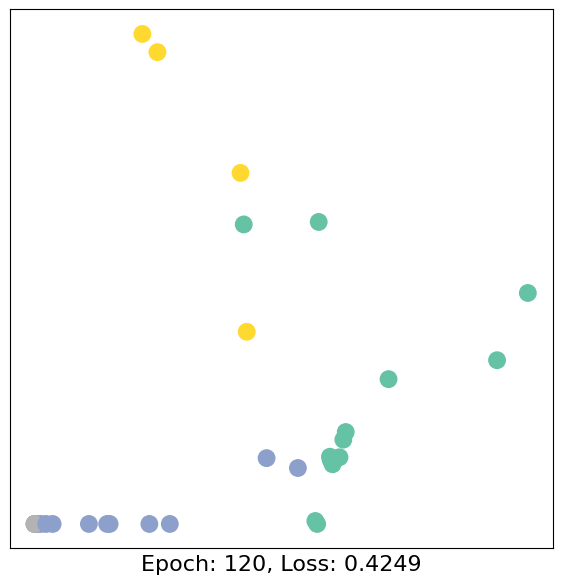

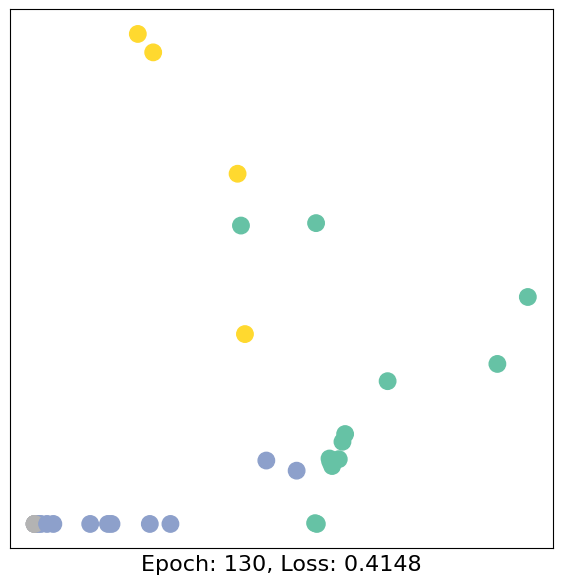

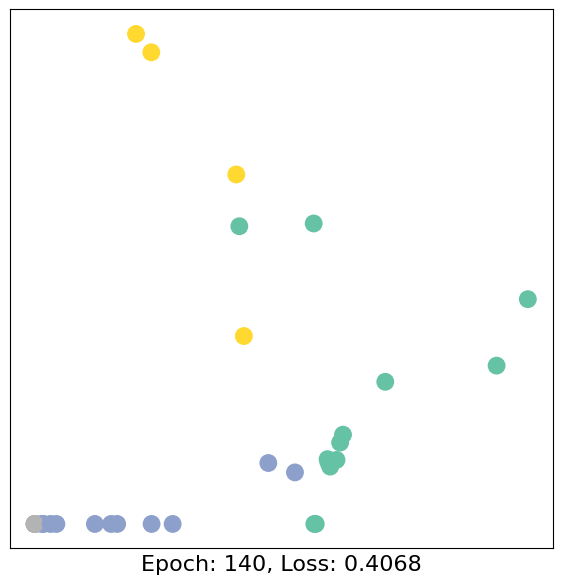

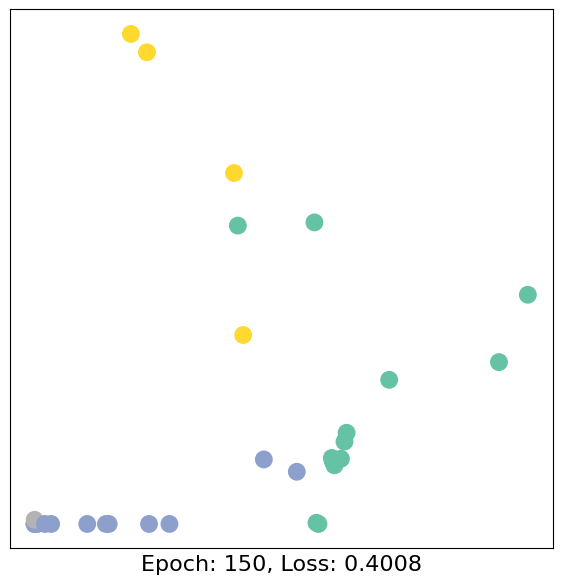

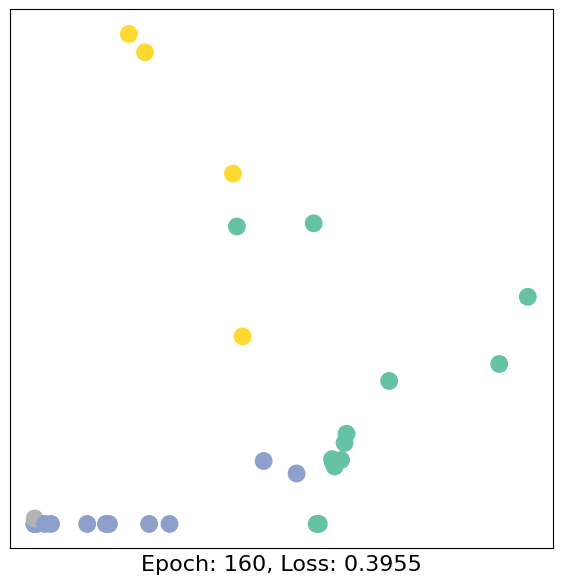

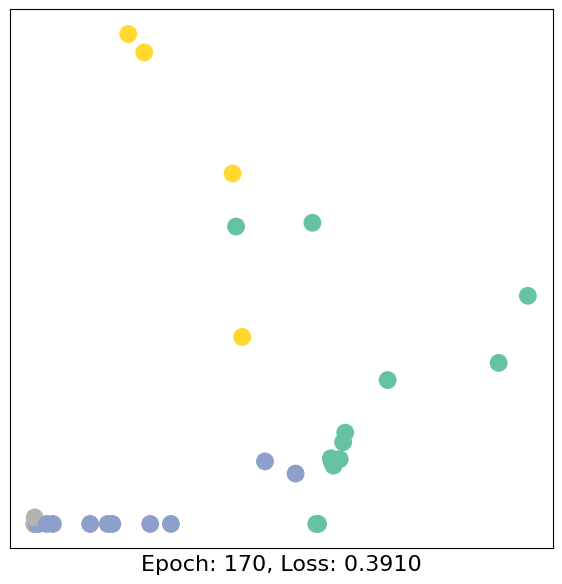

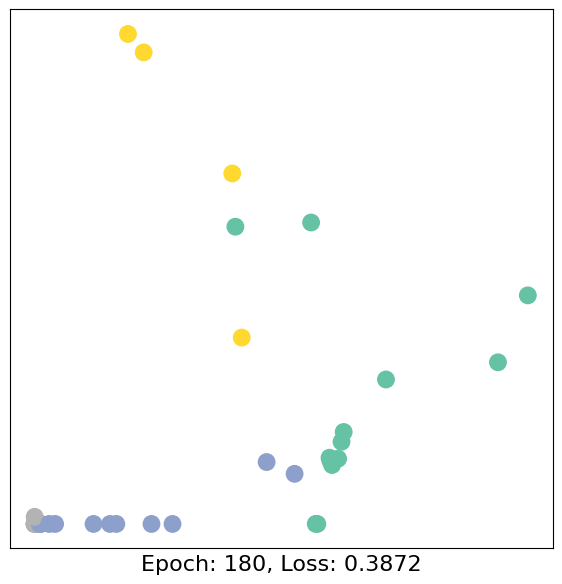

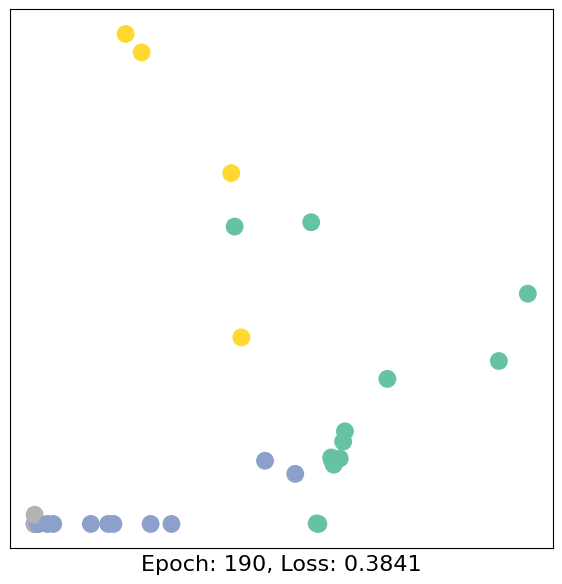

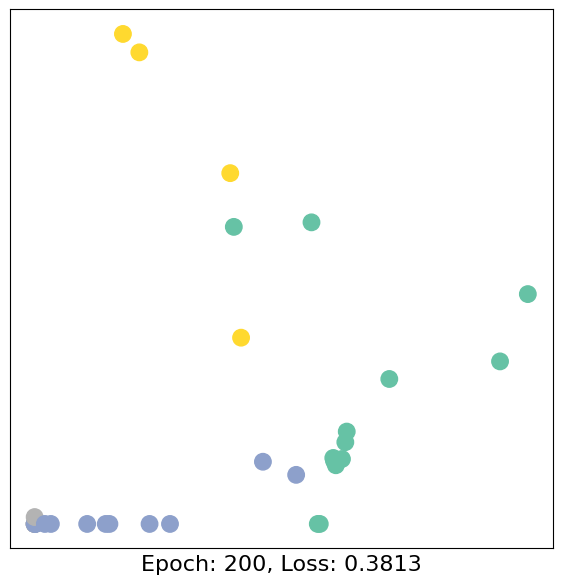

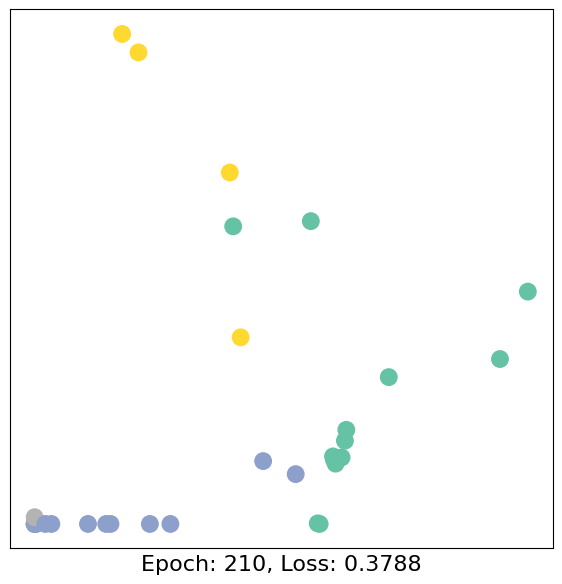

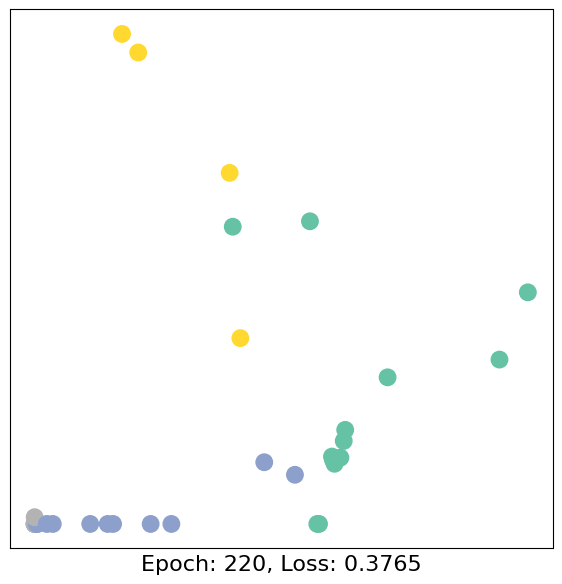

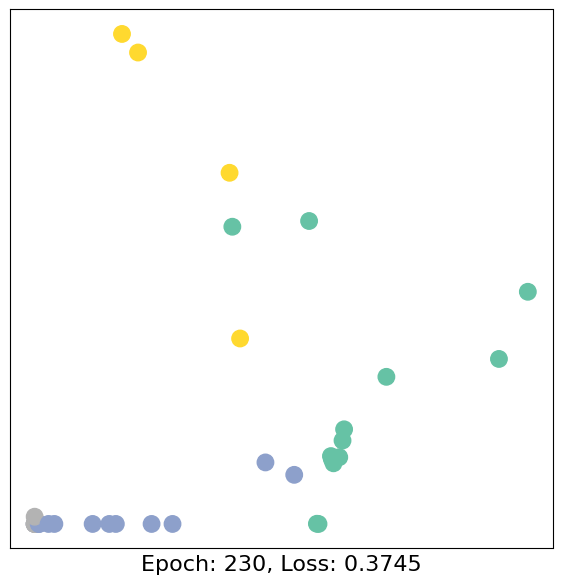

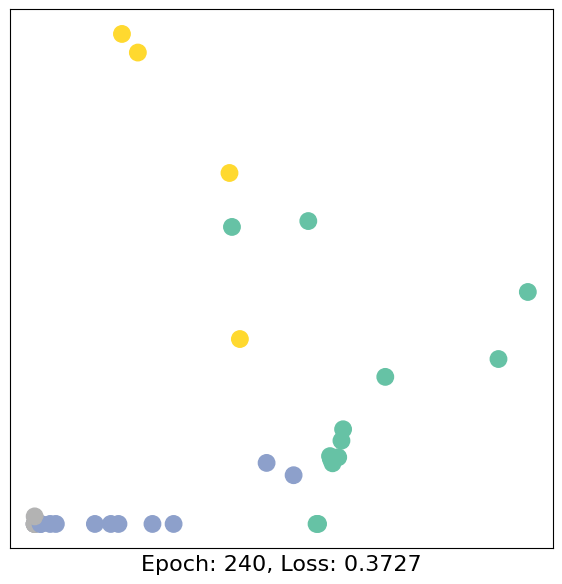

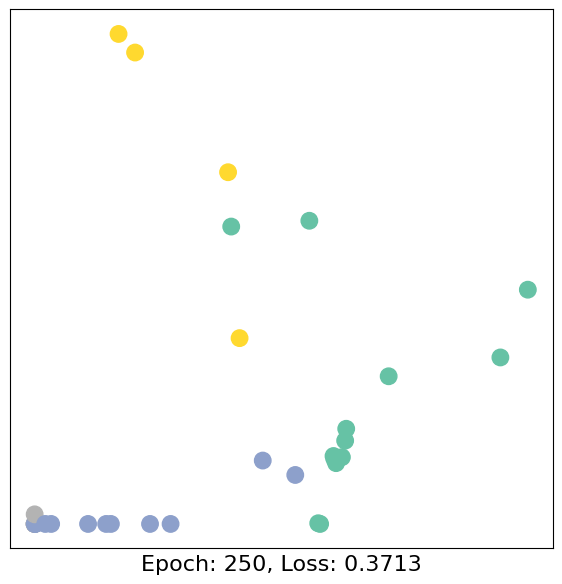

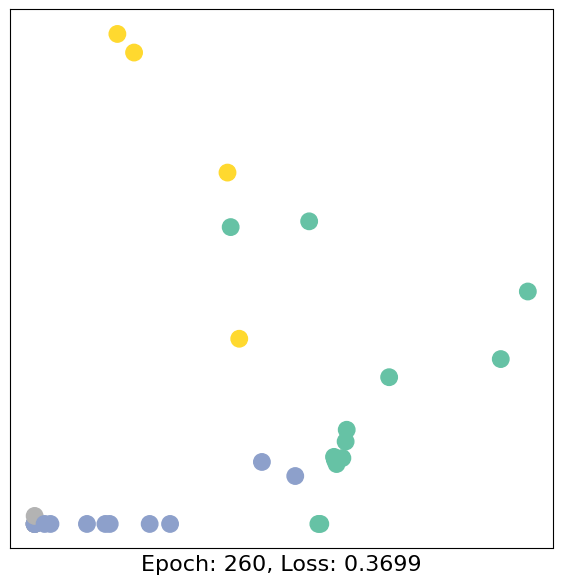

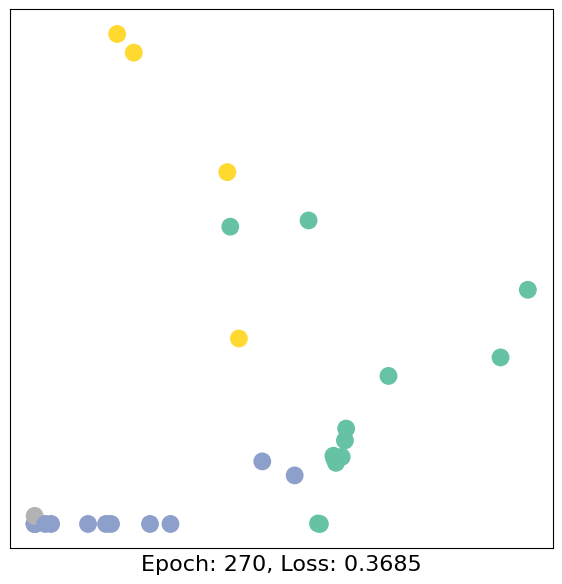

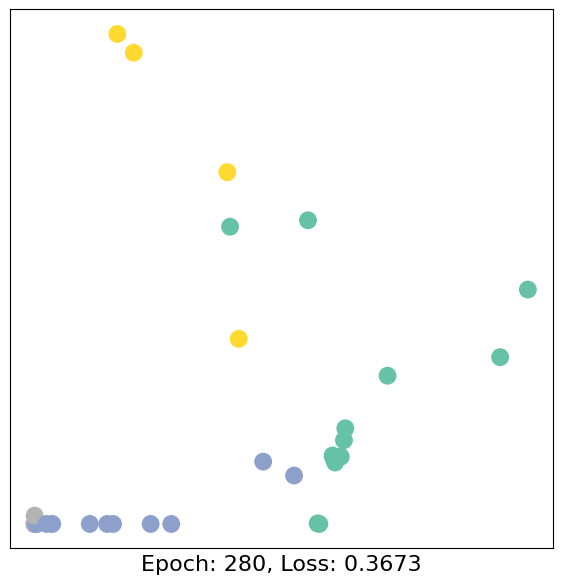

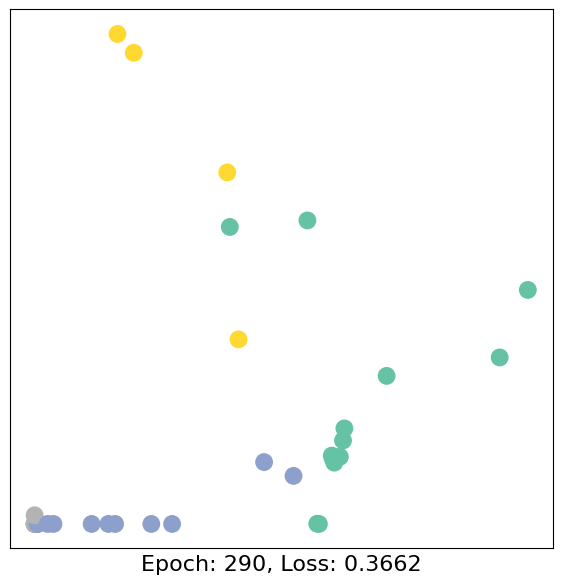

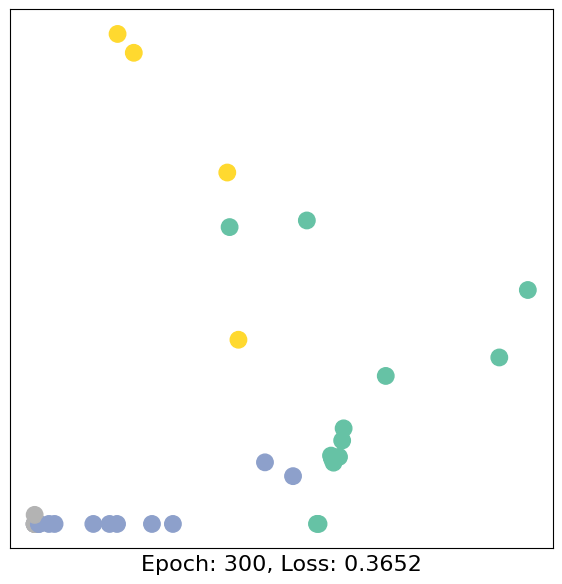

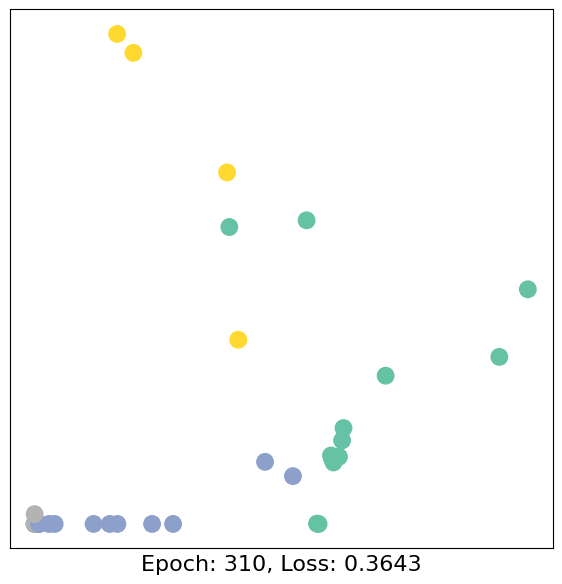

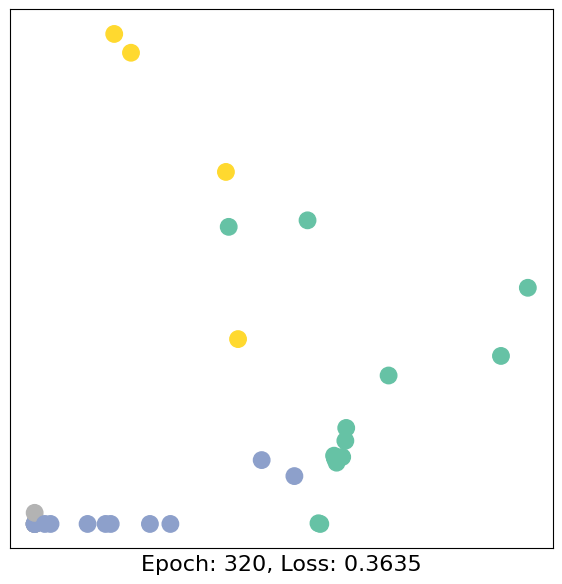

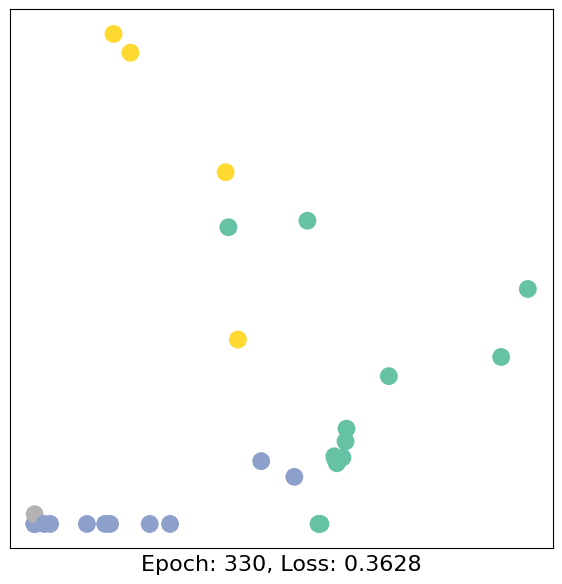

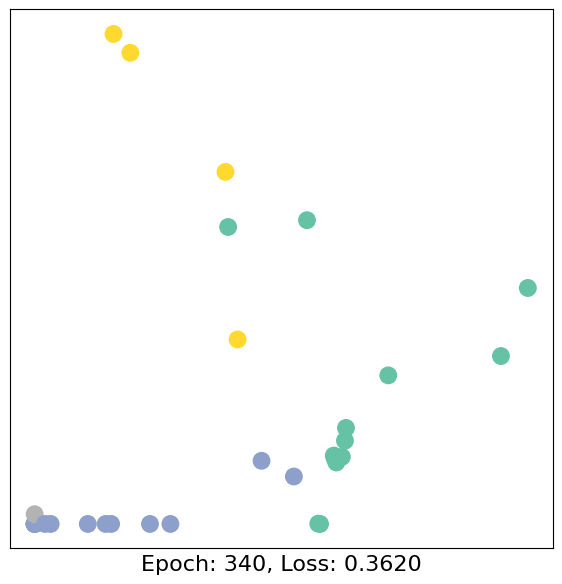

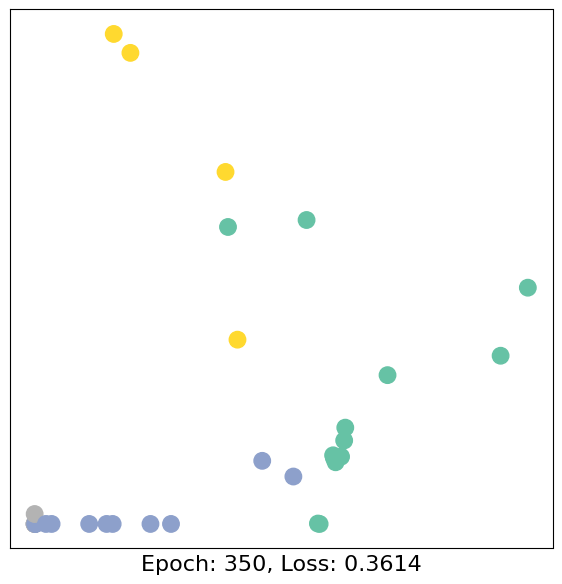

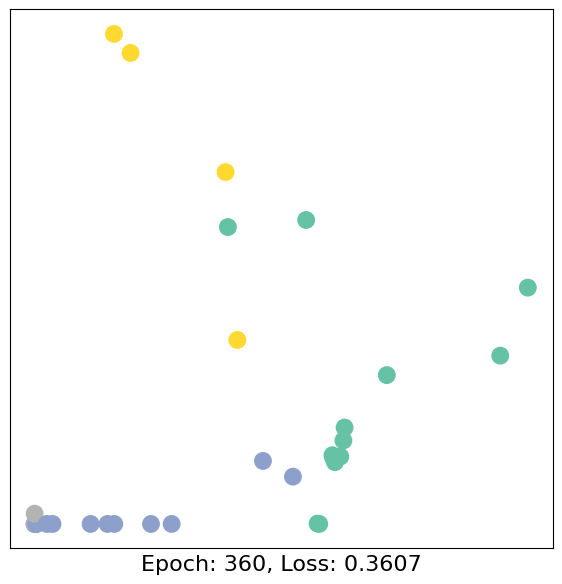

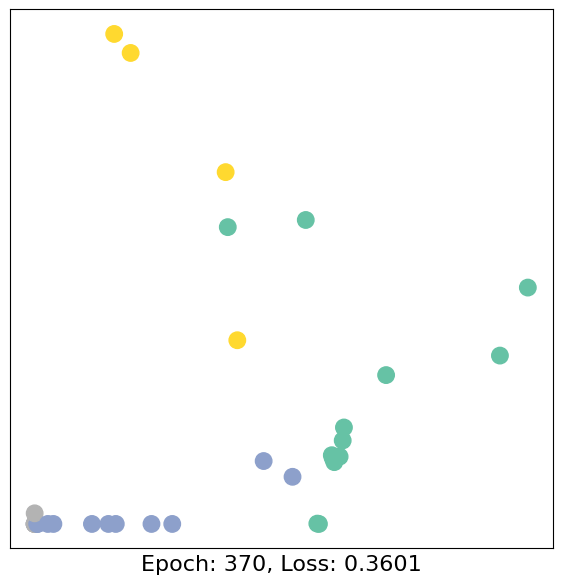

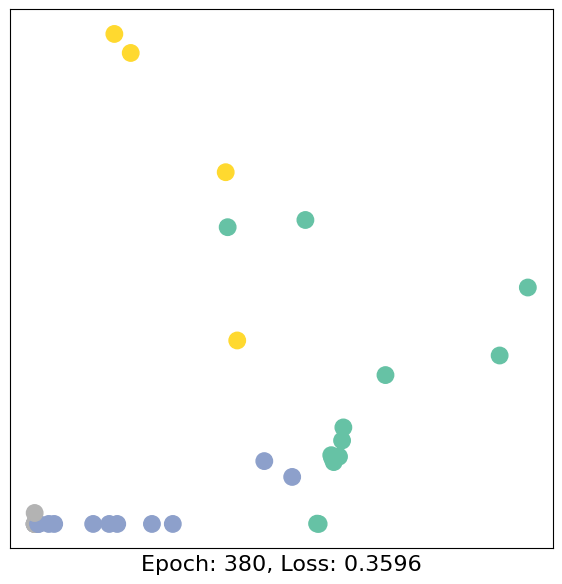

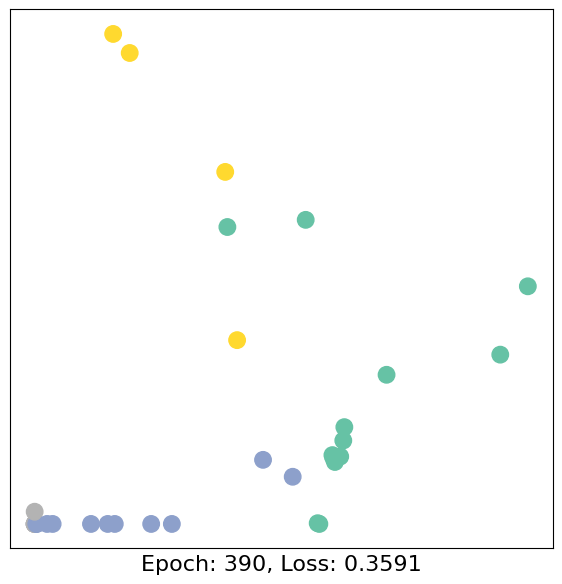

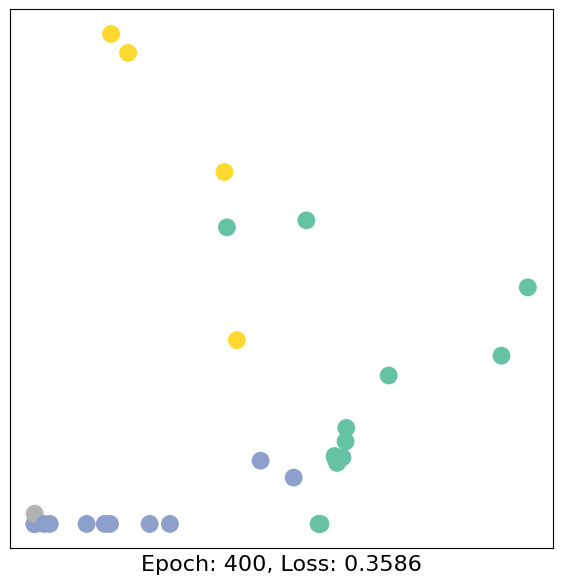

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h



@torch.no_grad()

def test(data):

    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)

    return accs



for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

From our model above we can see how our Loss function improves the prediction of our model by completing multiple cycles(epoch)

# Cora
We attempt the same procedure with a different dataset.
This is where we collect our Cora dataset which will also list the number of graphs, features and classes.


In [ ]:
from torch_geometric.datasets import Planetoid # we import dataset from karateclub

dataset = Planetoid("","Cora")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...
Done!


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


We expand more on this by outputing the number of nodes, edges, average node degree, training node etc...

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Graphs  | # of edges  | # of Classes  |
|---|---|---|---|
| Cora   | 2708  | 10556   | 7  |

##Visualization of our Cora

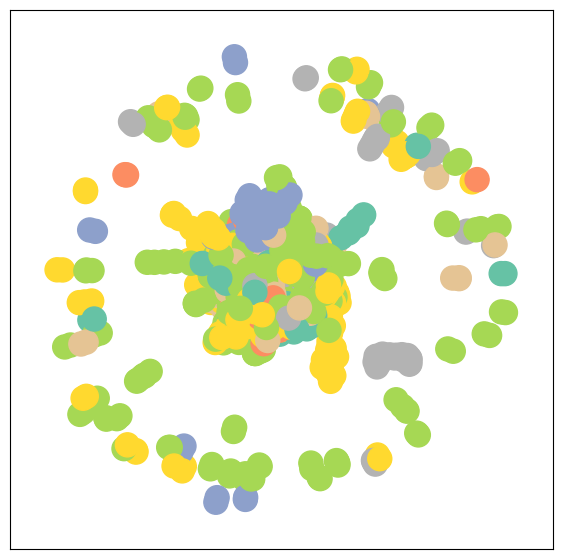

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

##GCN + Relu Cora

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=7, bias=True)
)


##Embedding the Cora Network

Embedding shape: [2708, 2]


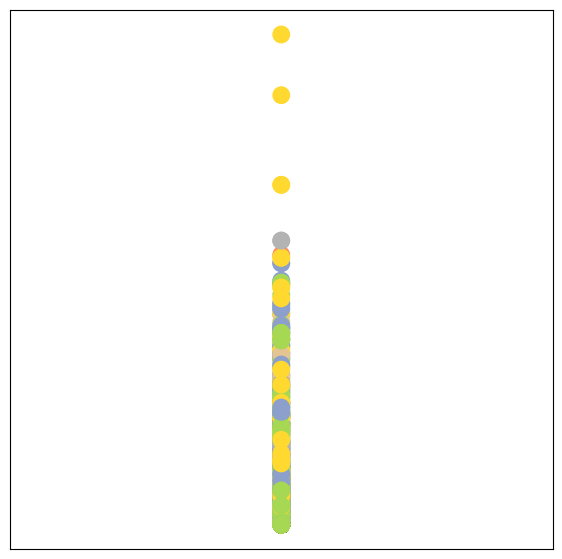

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

##Training on the Cora Network

<IPython.core.display.Javascript object>

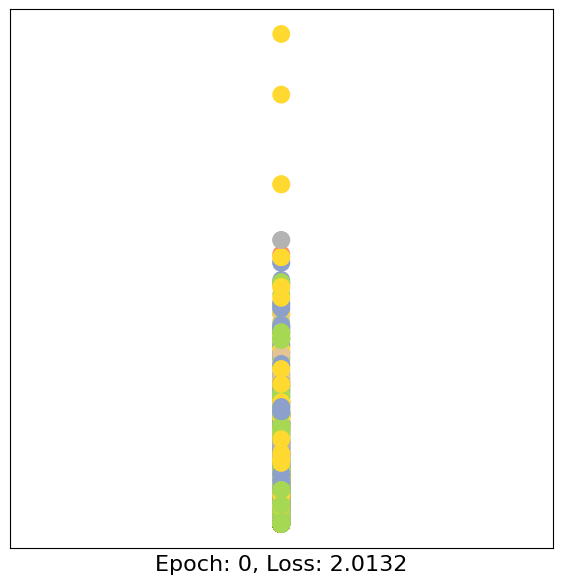

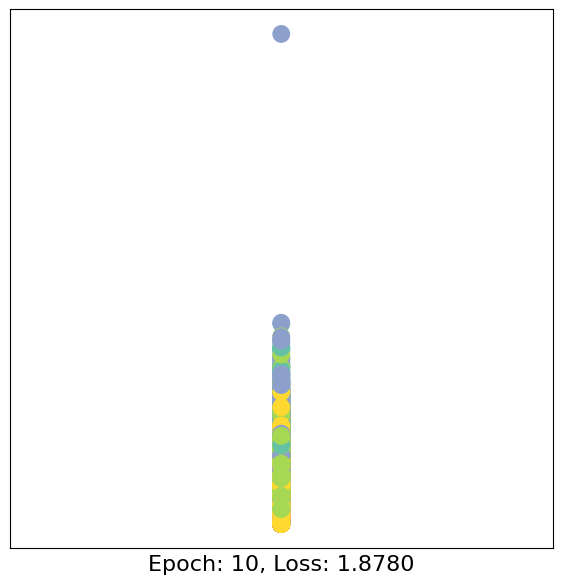

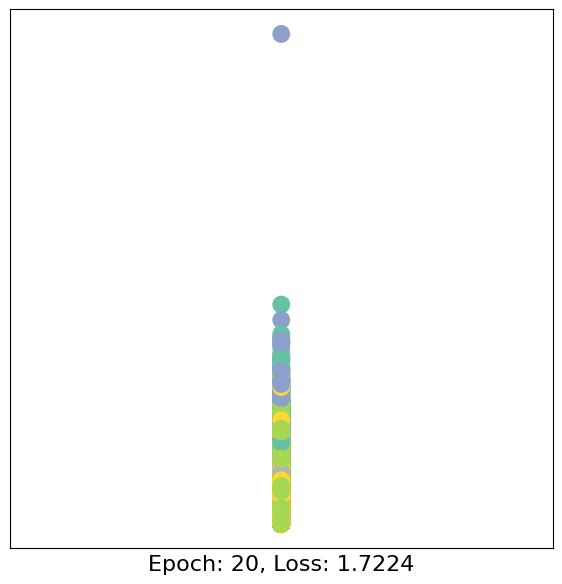

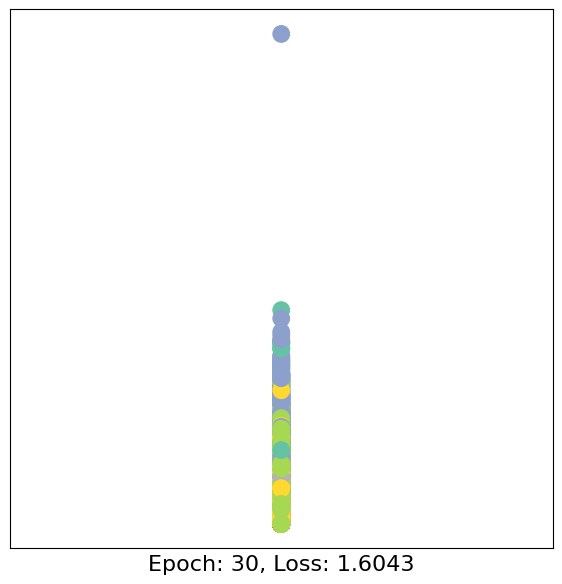

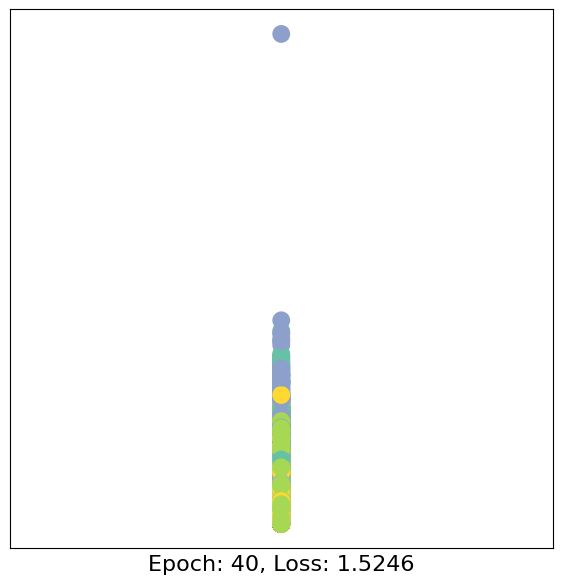

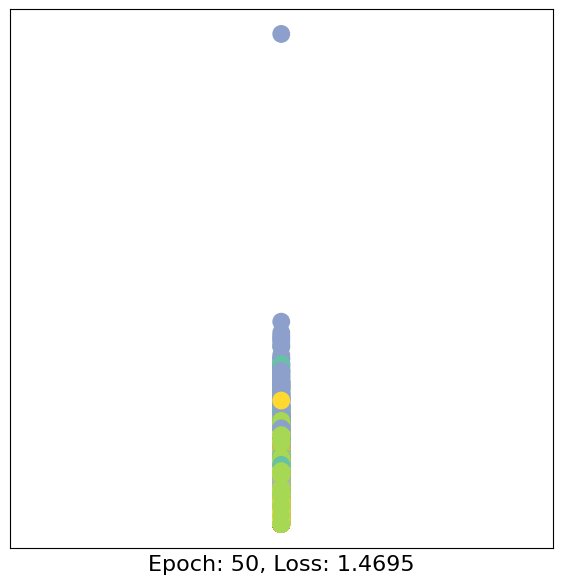

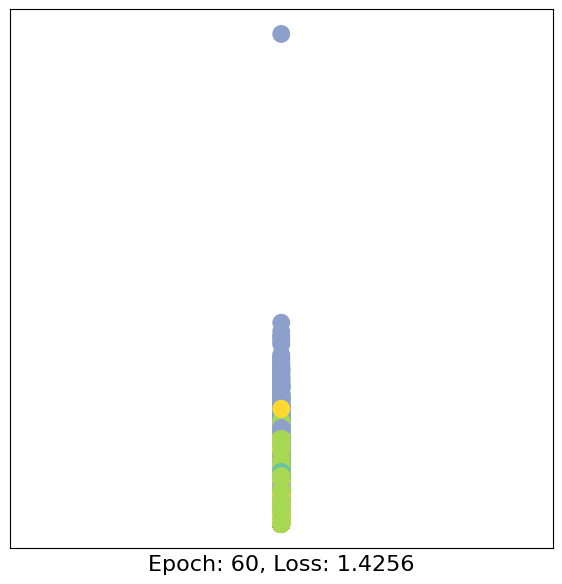

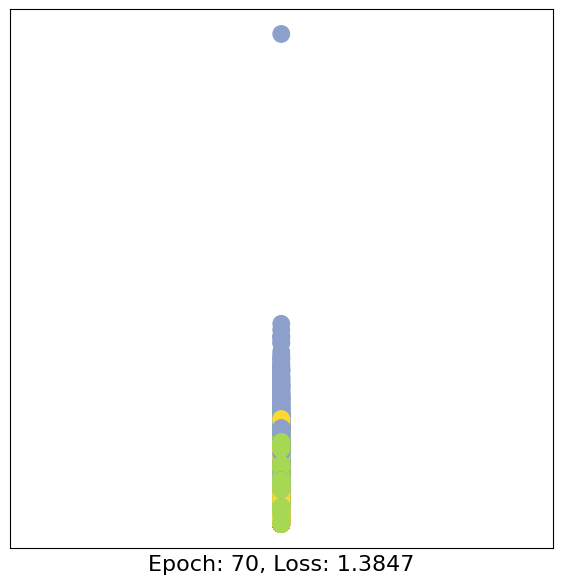

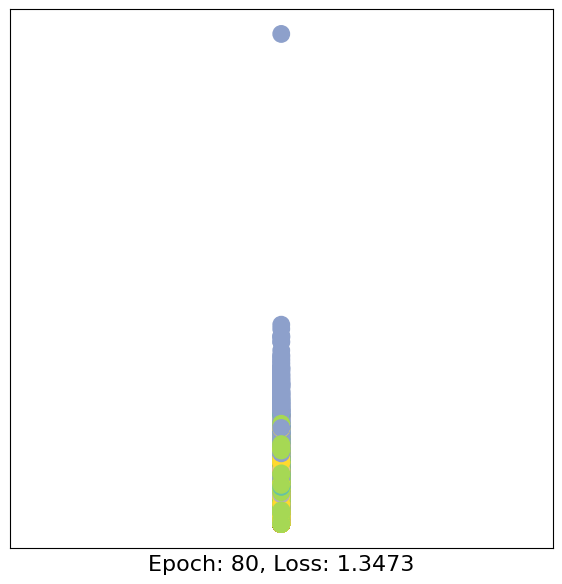

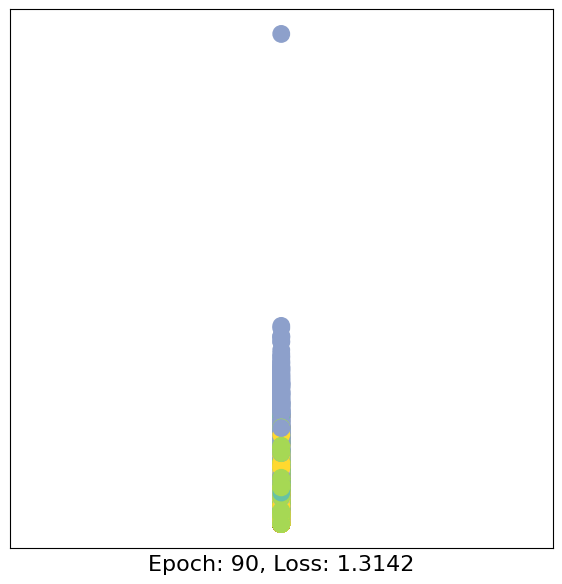

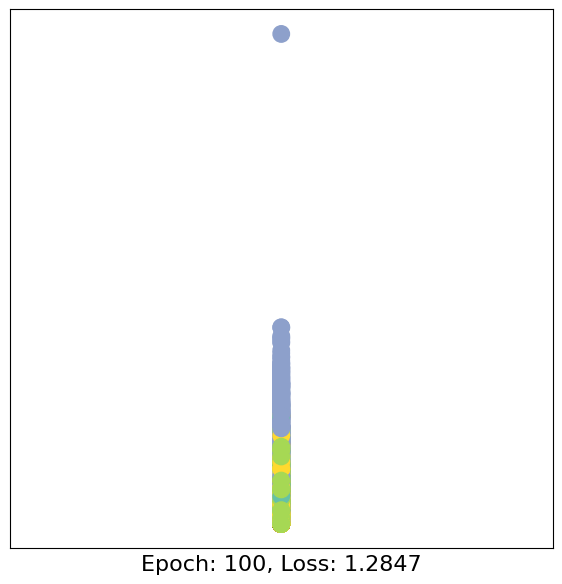

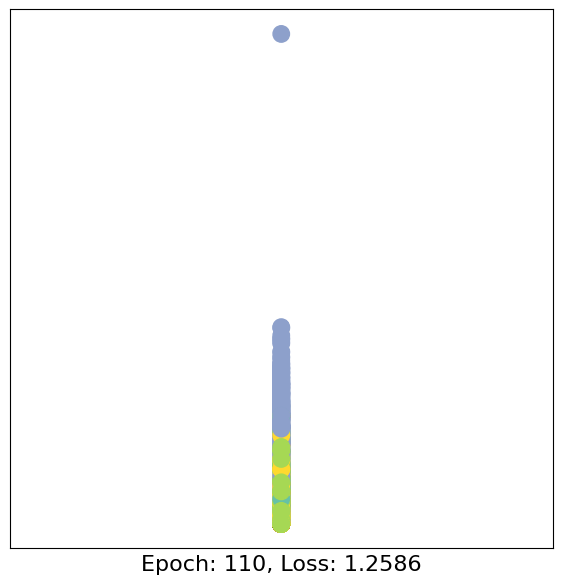

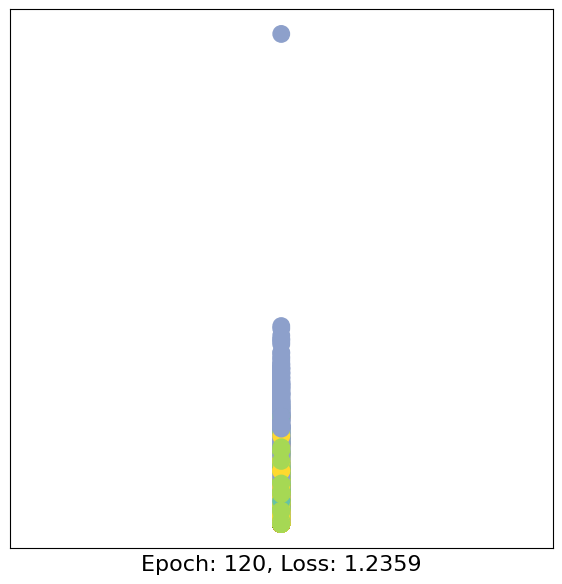

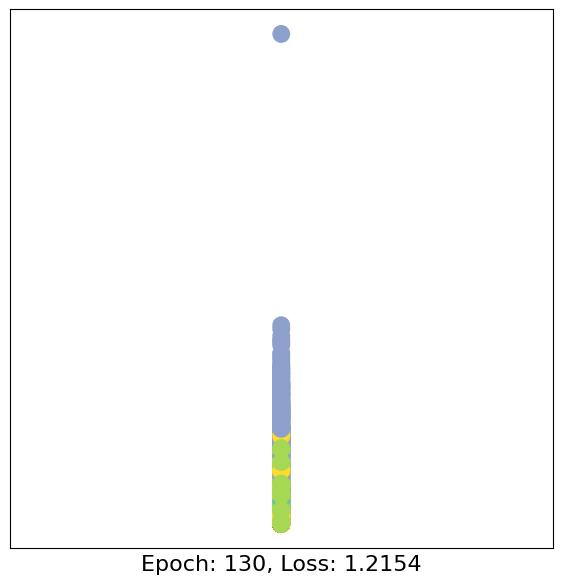

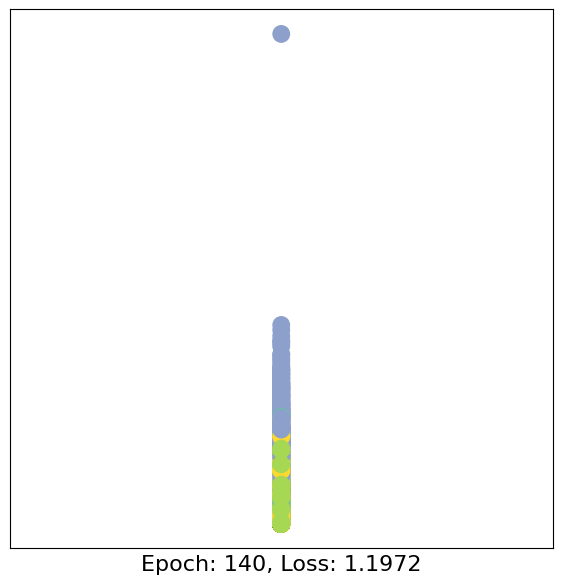

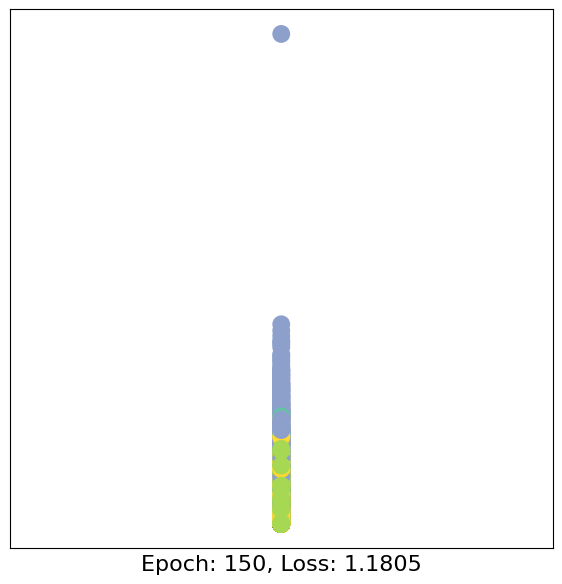

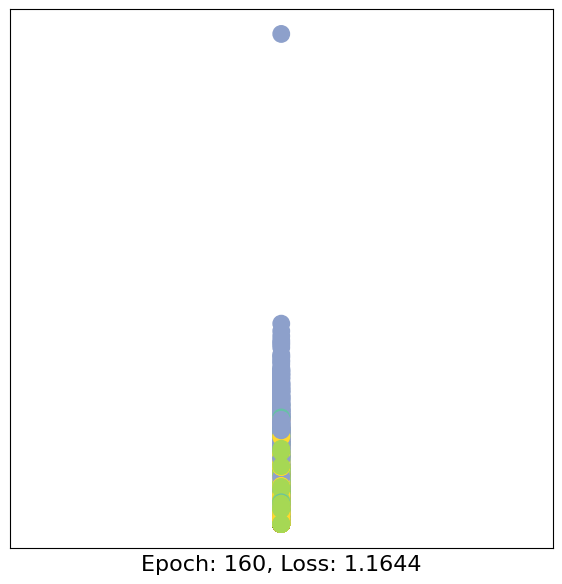

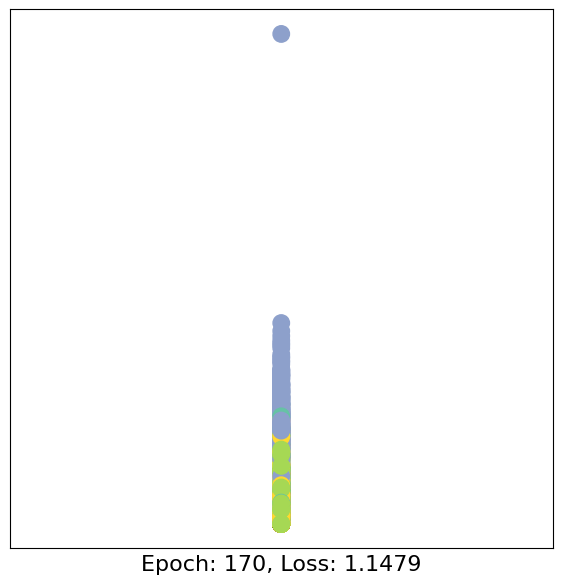

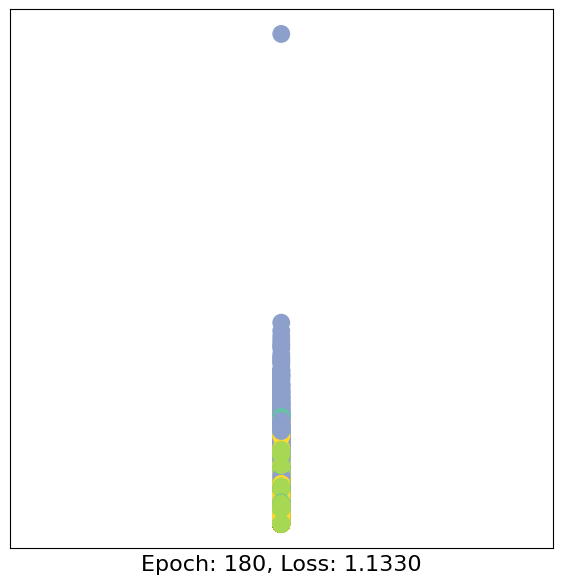

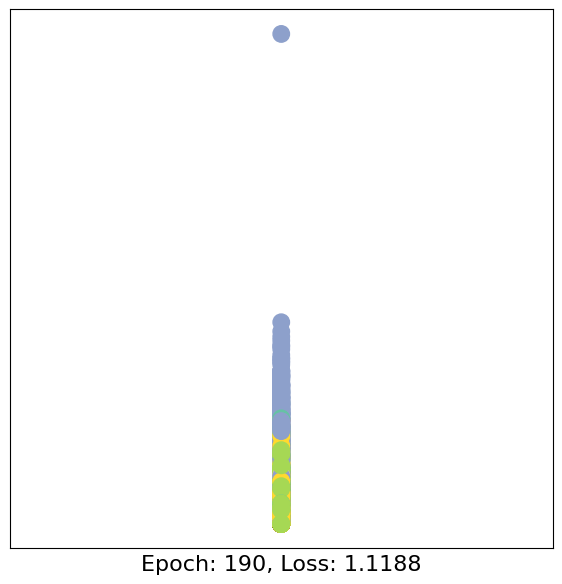

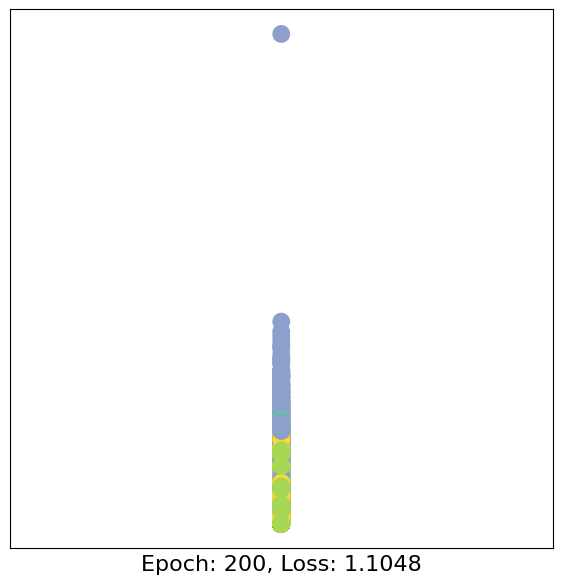

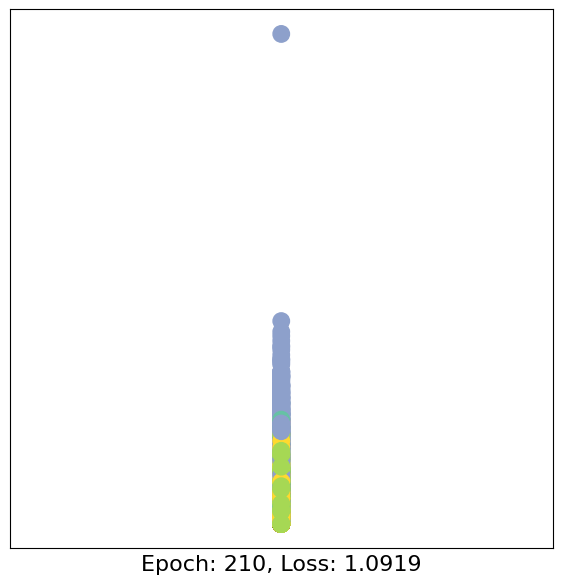

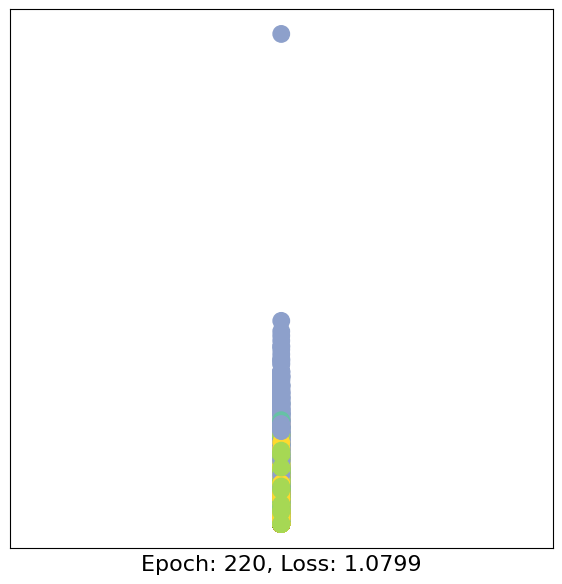

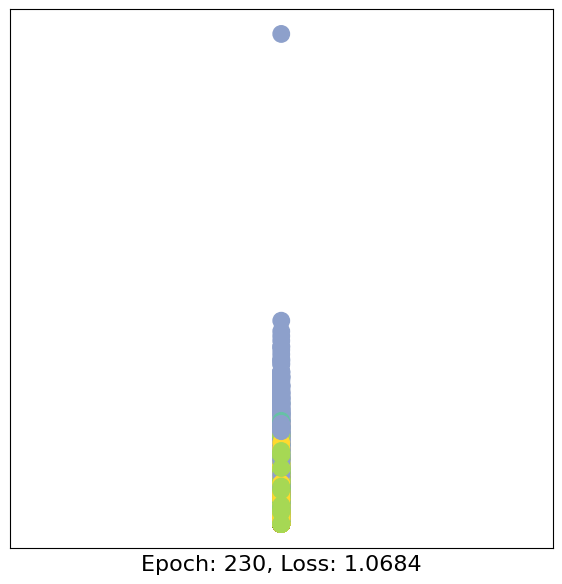

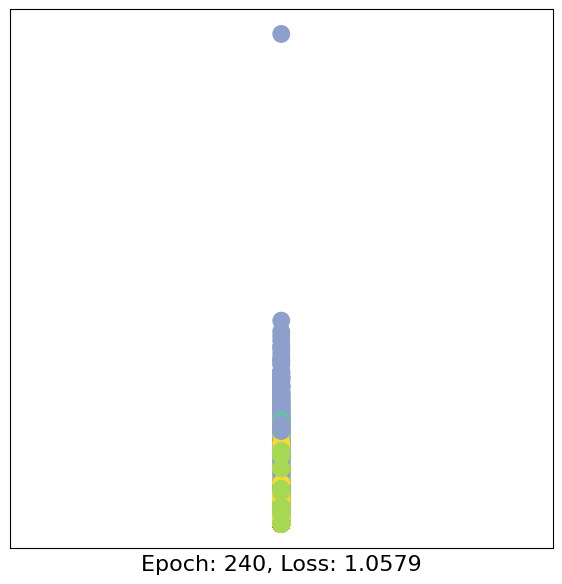

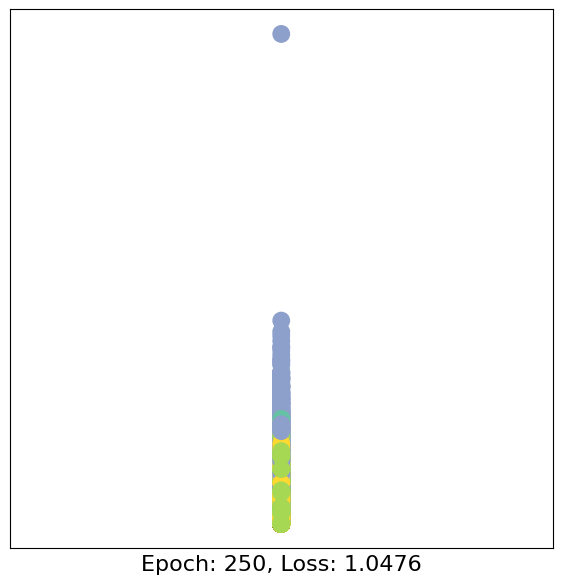

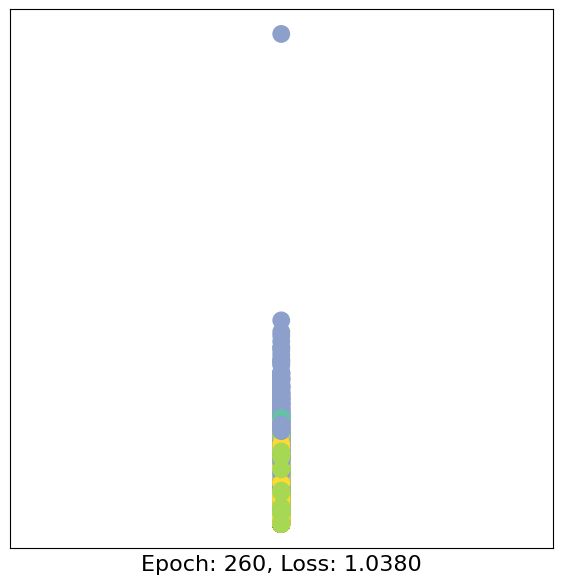

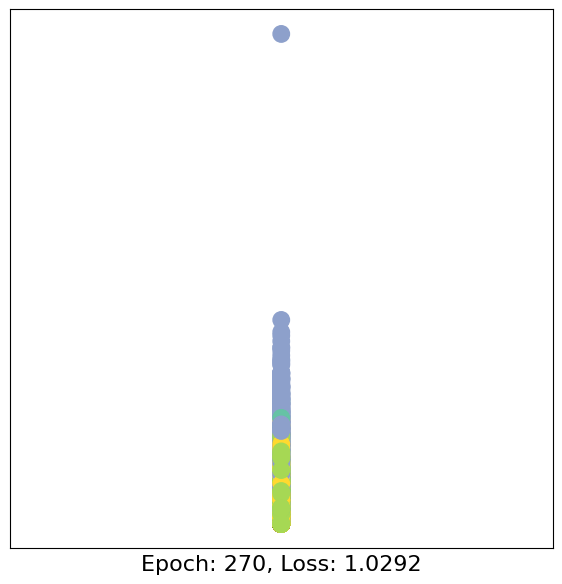

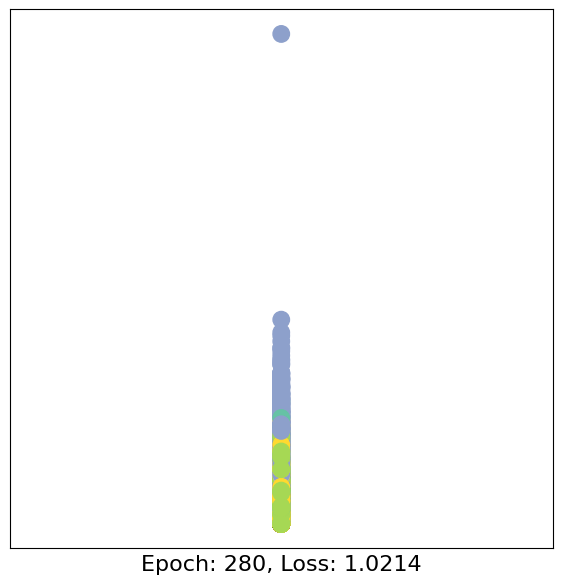

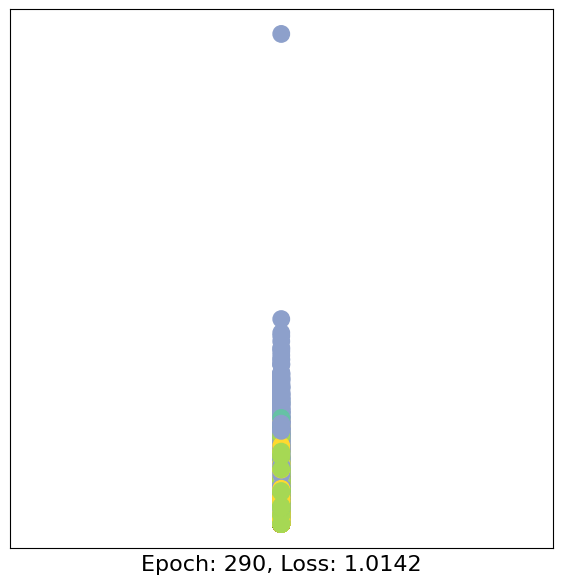

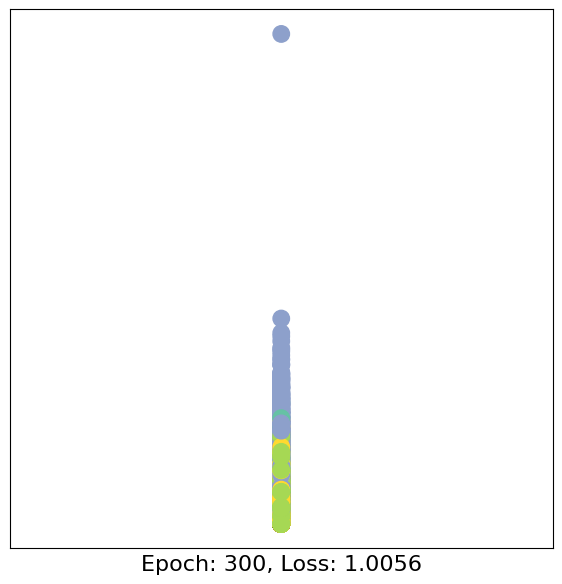

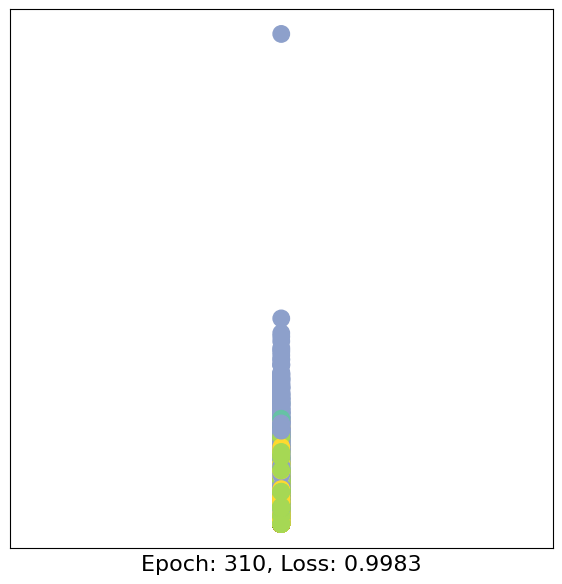

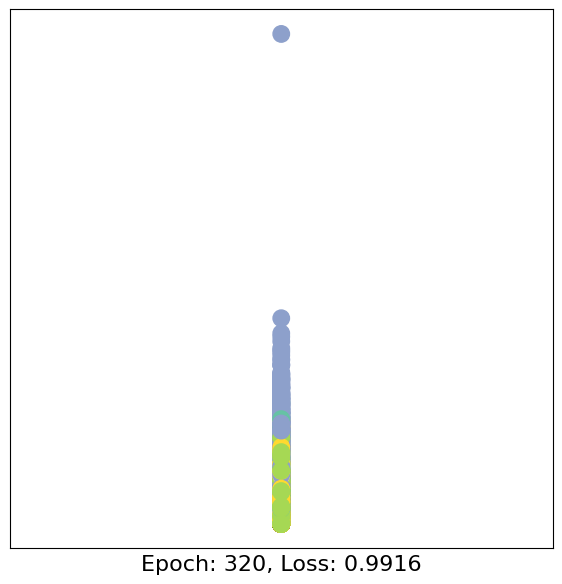

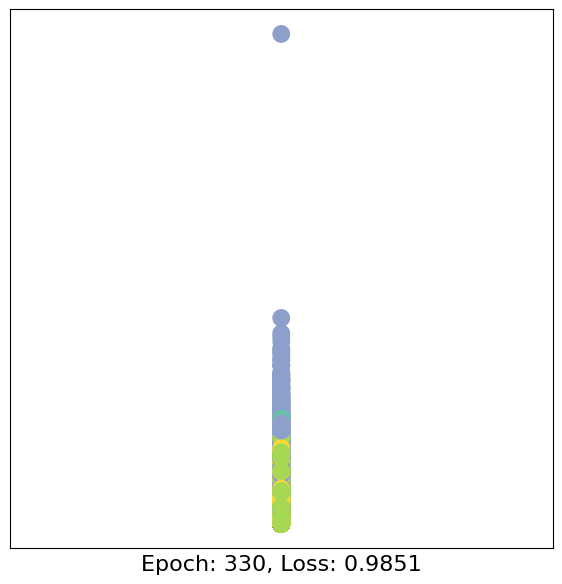

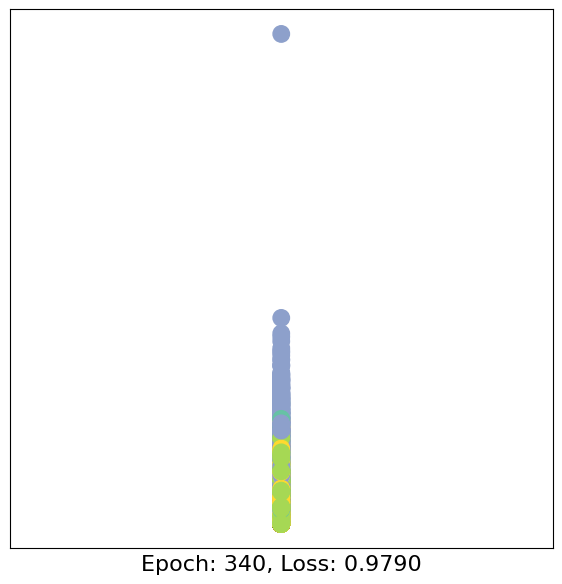

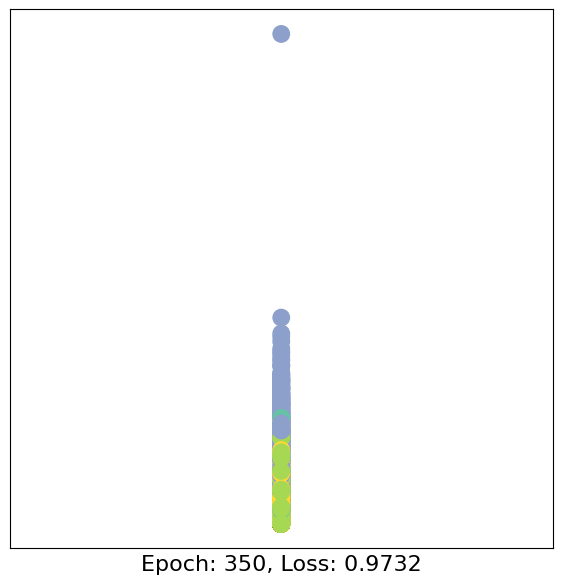

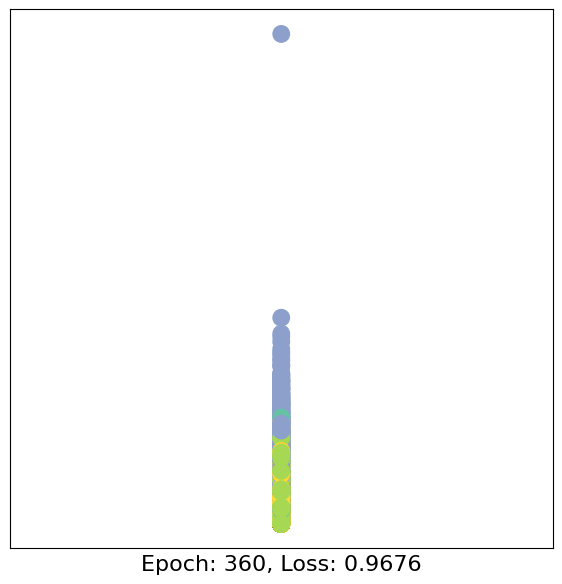

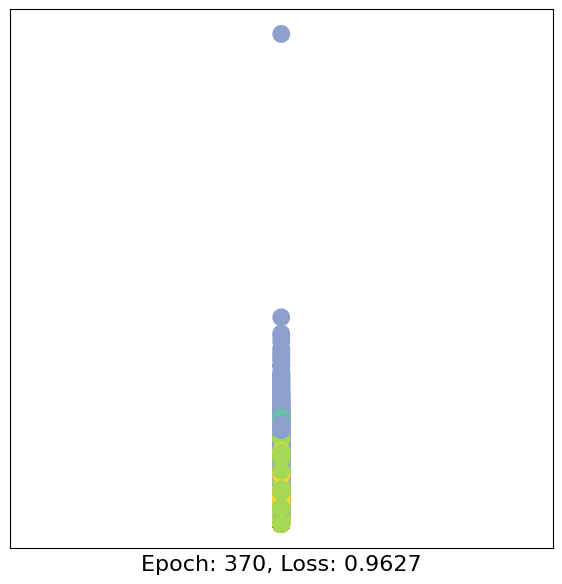

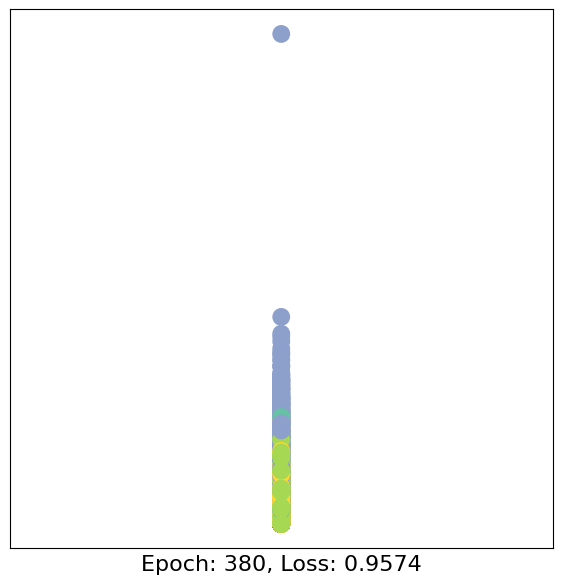

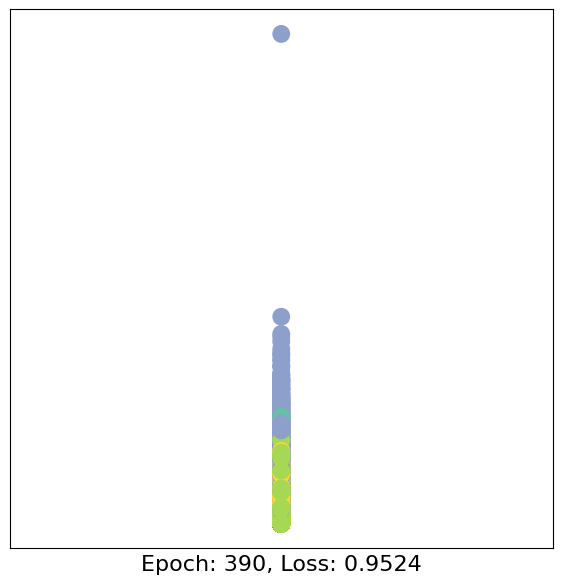

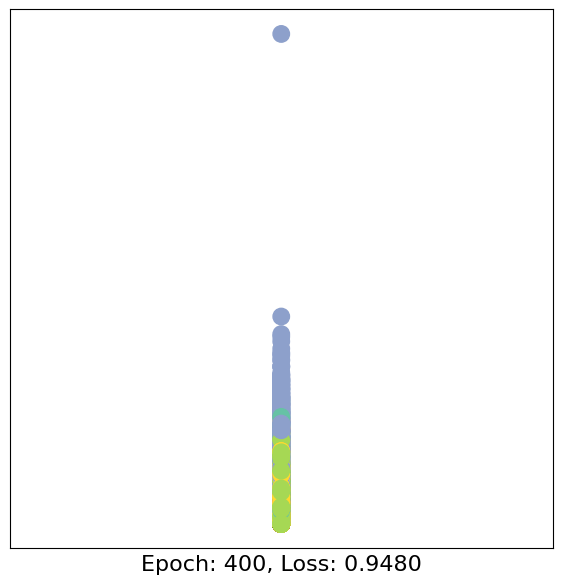

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h



@torch.no_grad()

def test(data):

    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)

    return accs



for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

#CiteSeer
We attempt the same procedure with a different dataset. This is where we collect our CiteSeer dataset which will also list the number of graphs, features and classes.


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid("", "CiteSeer")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6


Done!


We expand more on this by outputing the number of nodes, edges, average node degree, training node etc...

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


| Dataset  | # of Graphs  | # of edges  | # of Classes  |
|---|---|---|---|
| Cite Seer  | 3327  | 9104   | 6  |

##Visualization of our Cite Seer
This is now the output of our current graph.

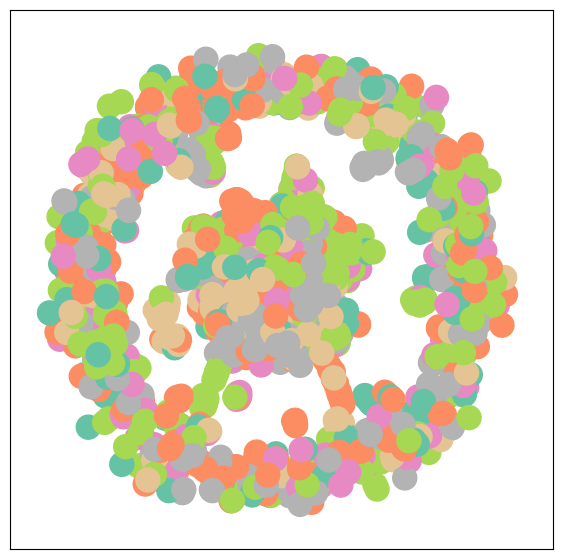

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

##GCN + Relu CiteSeer

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(3703, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=6, bias=True)
)


##Embedding the CiteSeer Network

Embedding shape: [3327, 2]


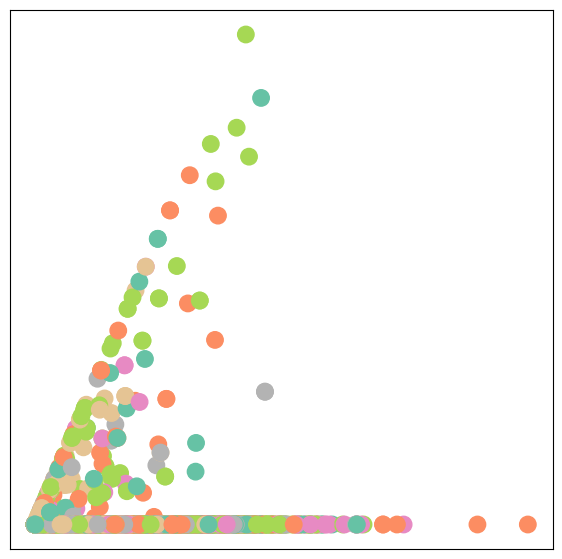

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

##Training on the CiteSeer Network

<IPython.core.display.Javascript object>

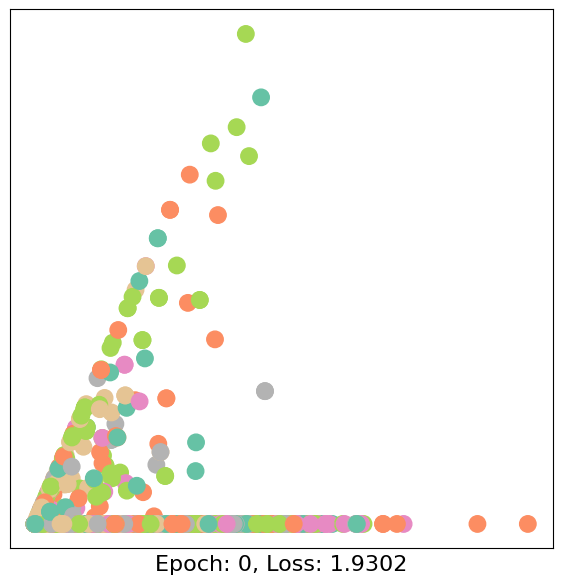

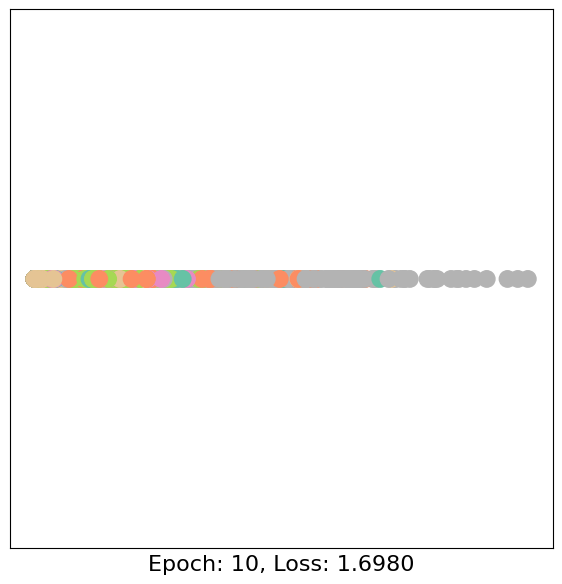

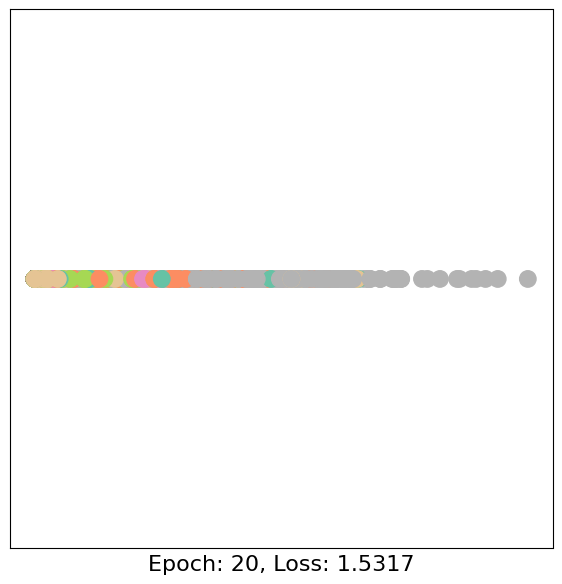

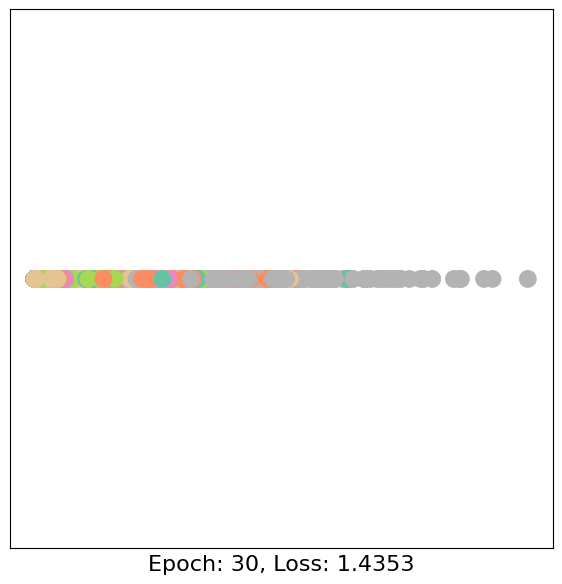

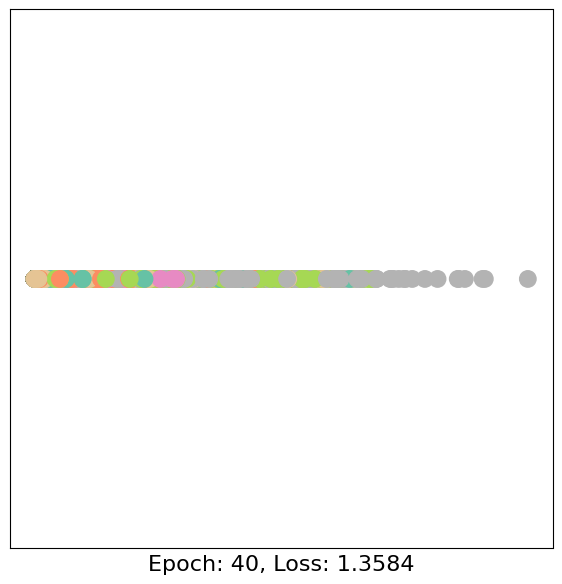

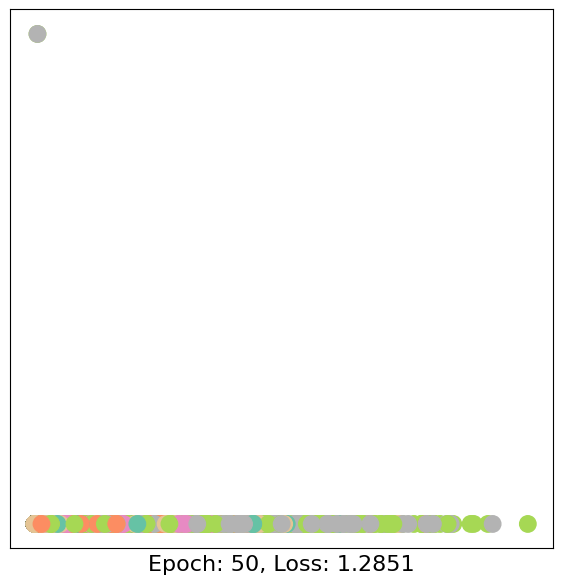

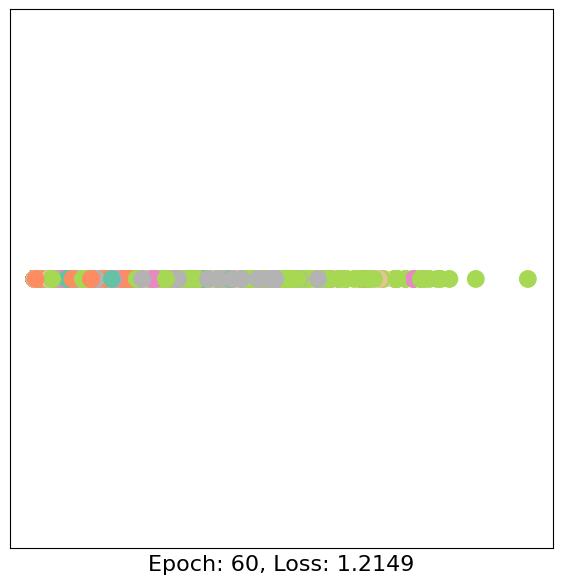

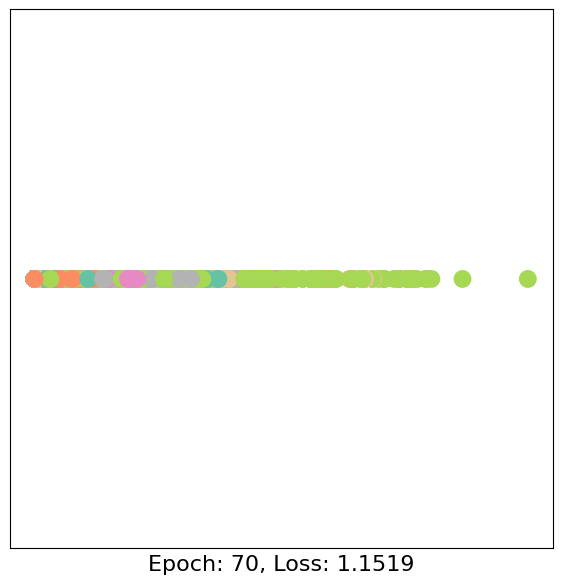

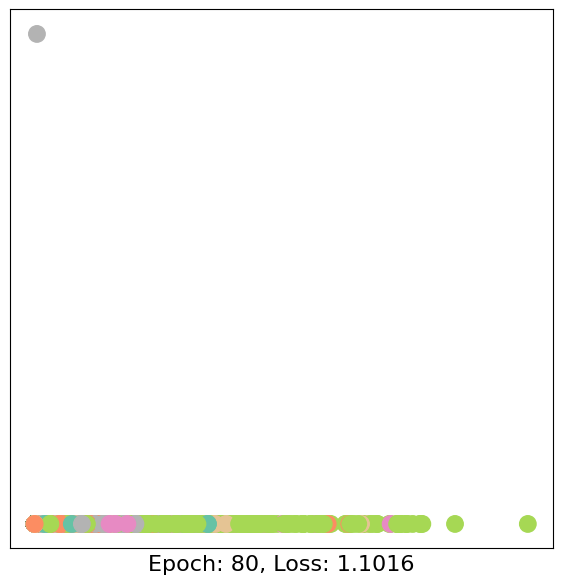

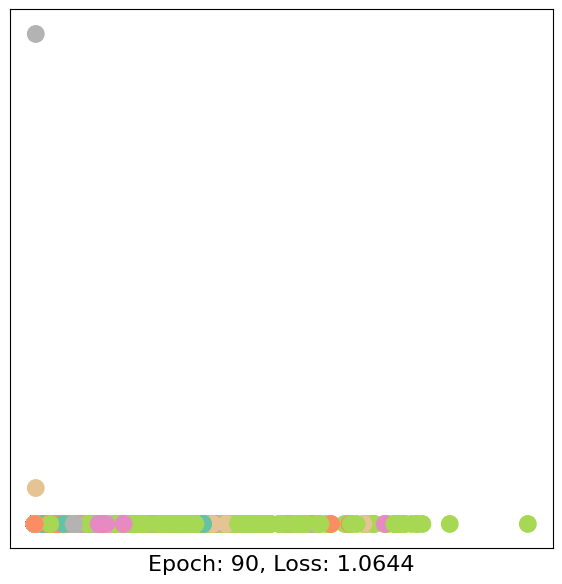

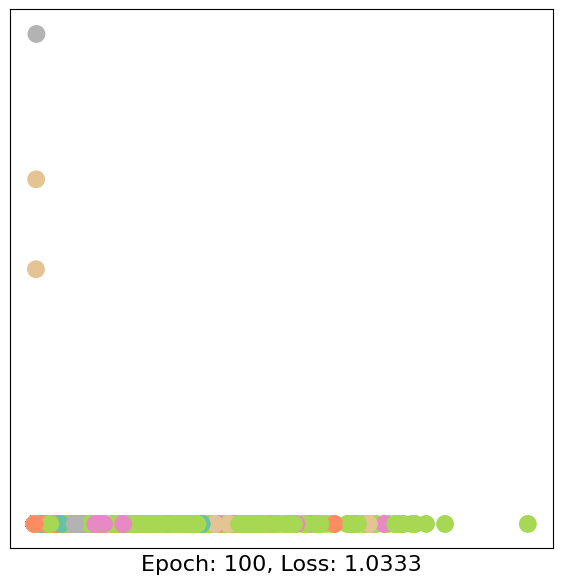

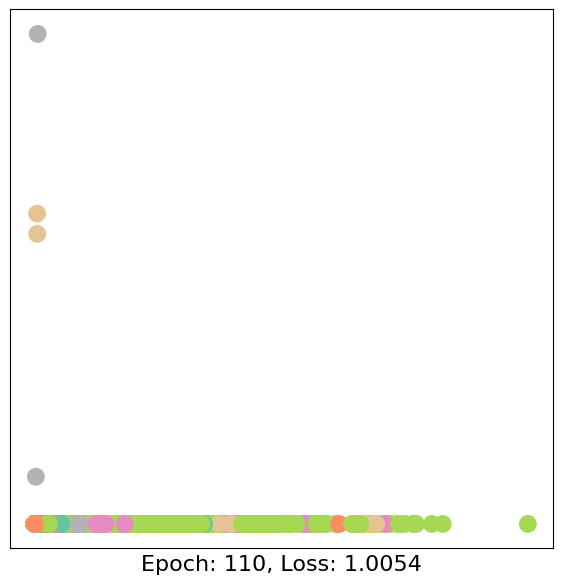

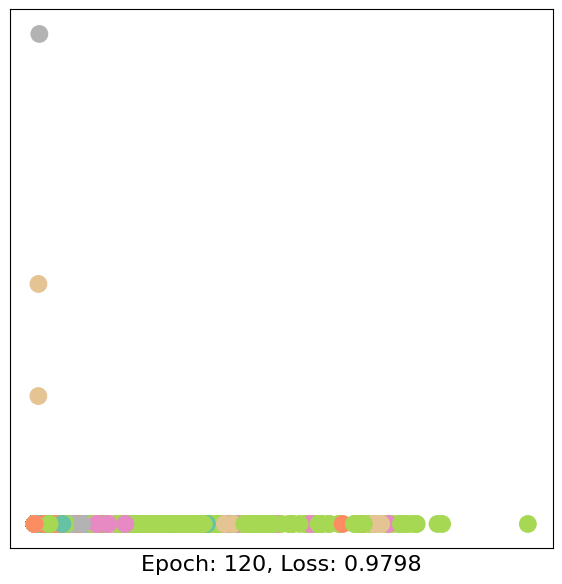

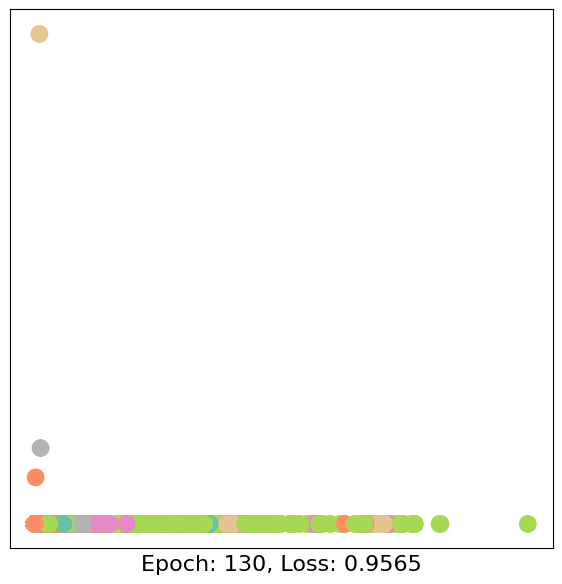

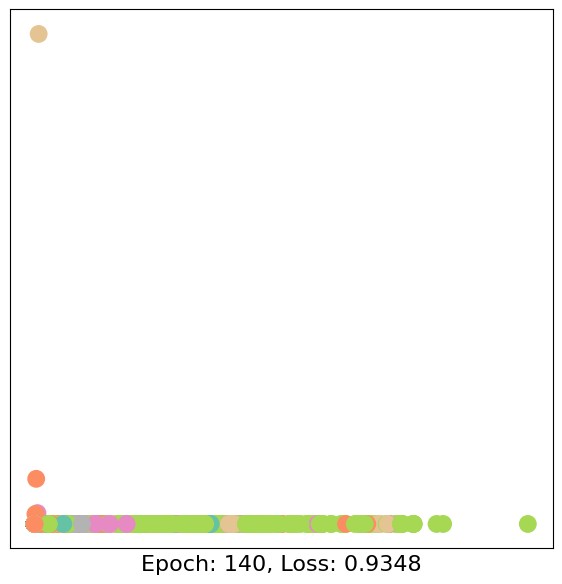

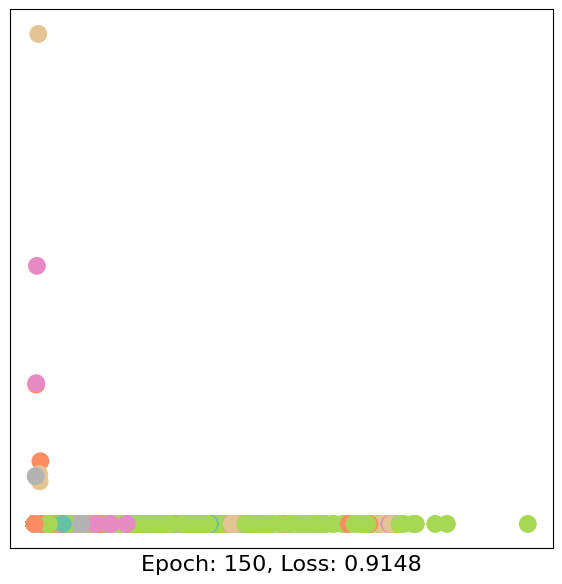

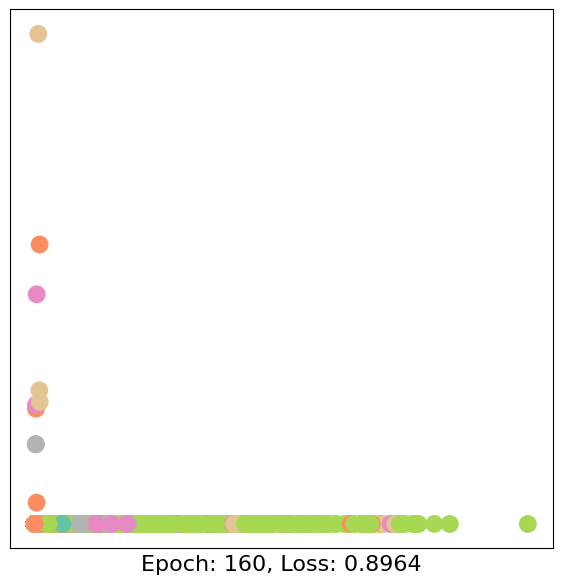

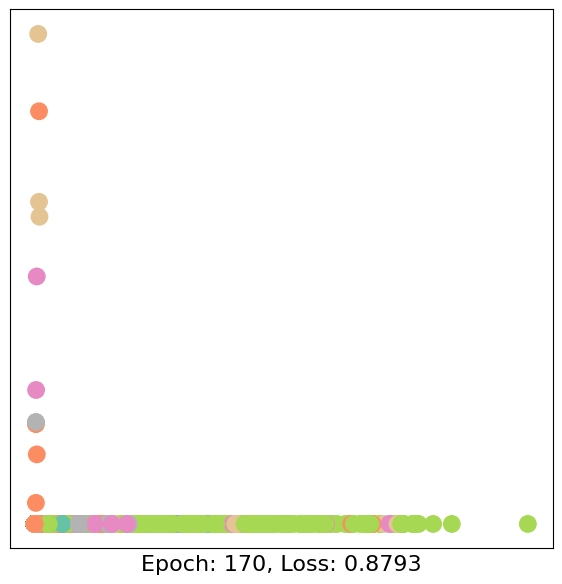

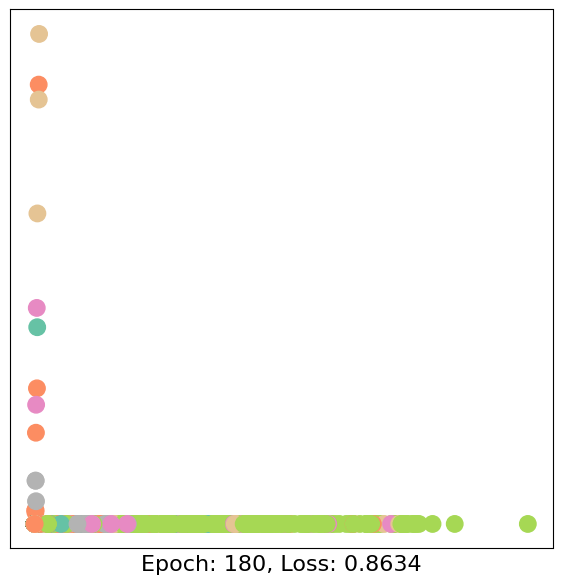

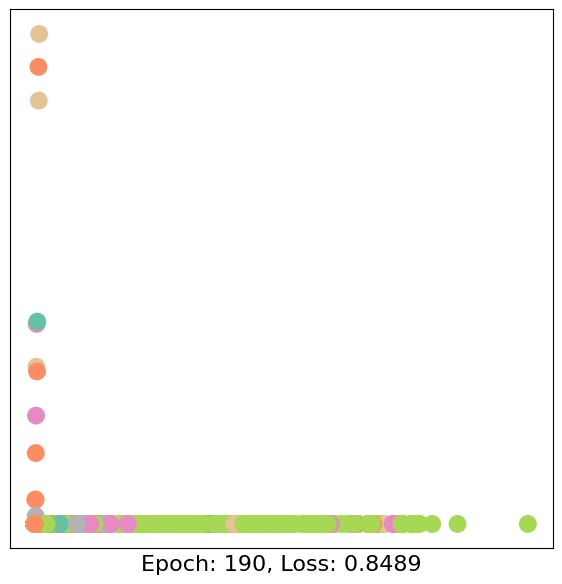

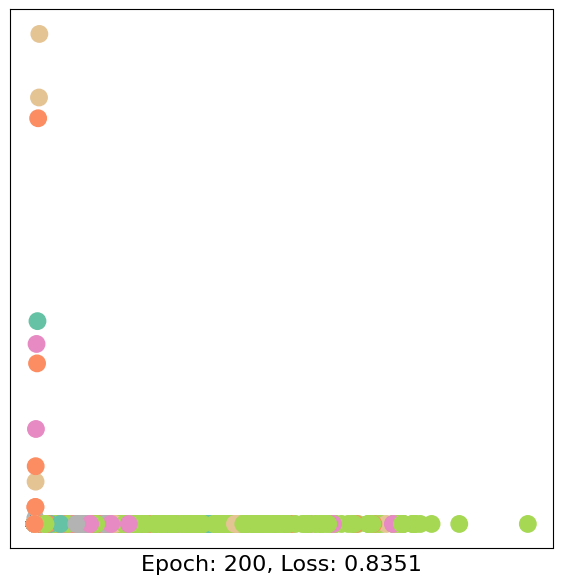

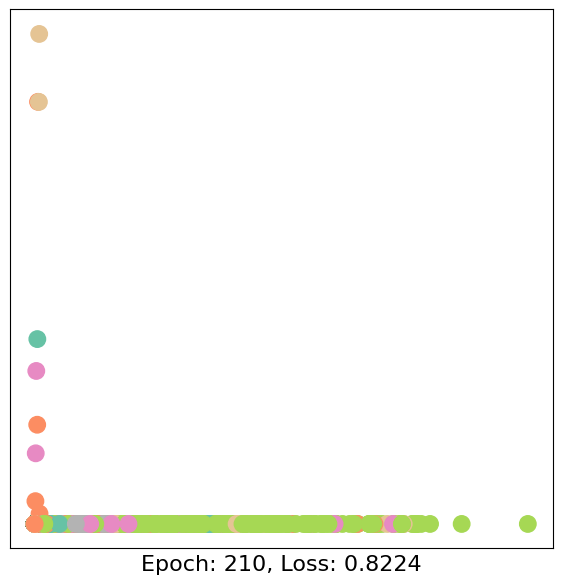

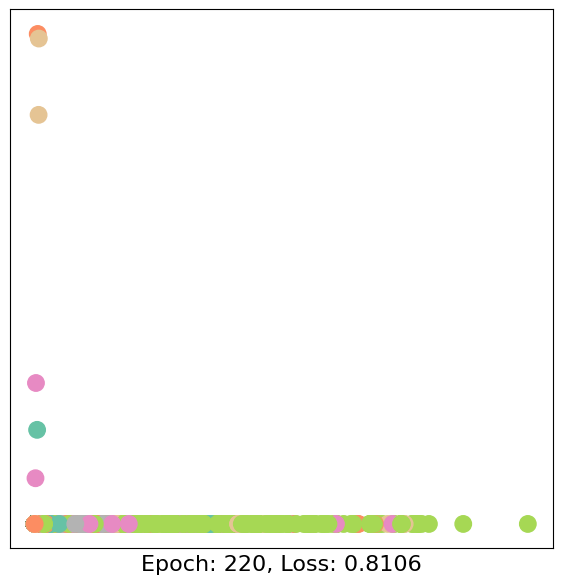

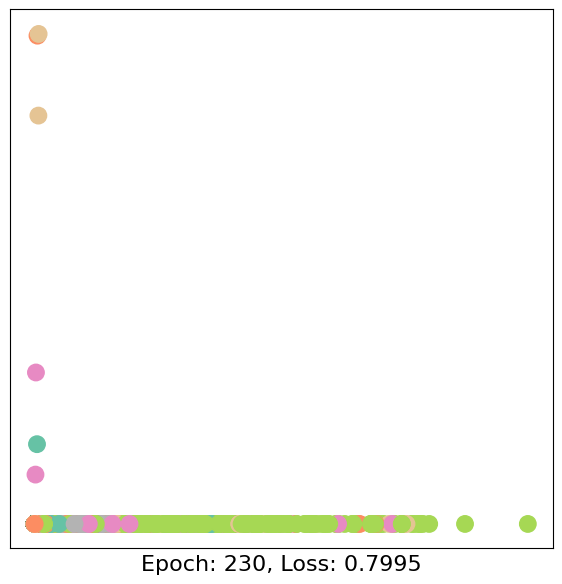

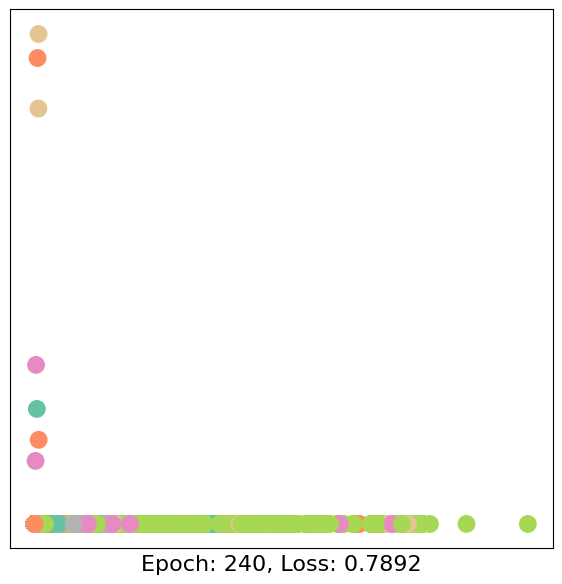

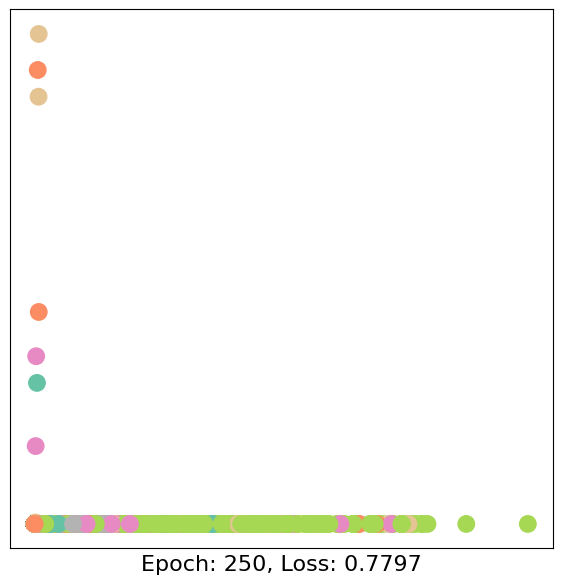

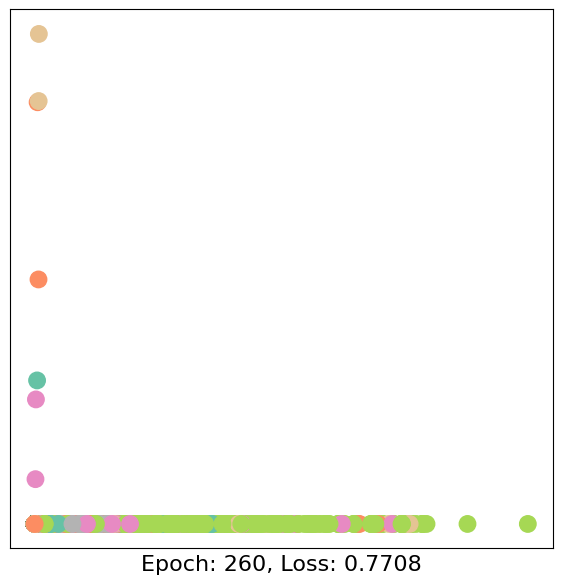

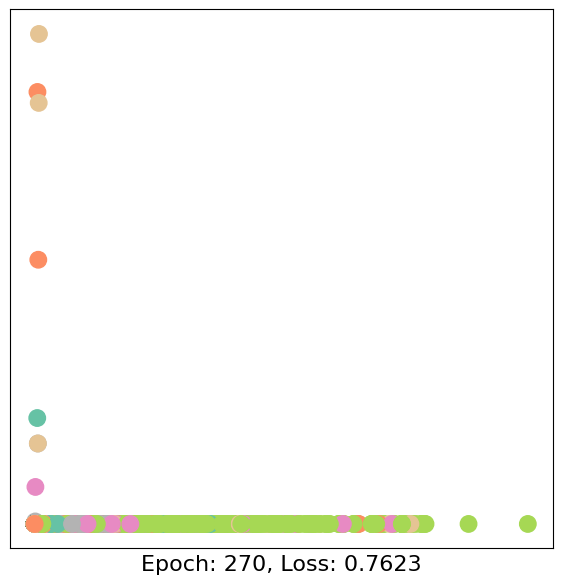

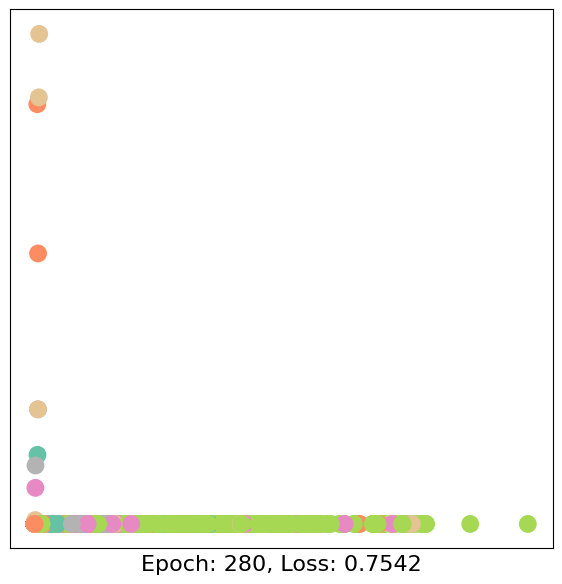

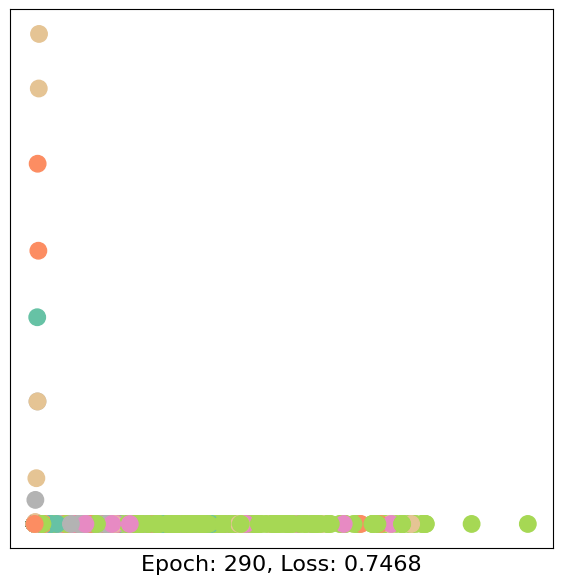

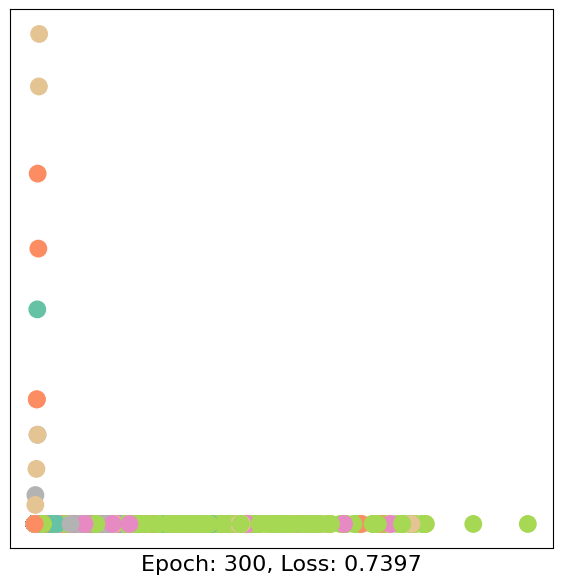

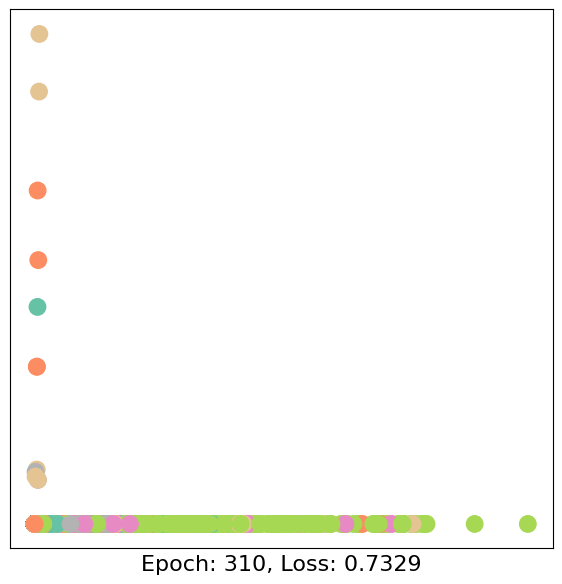

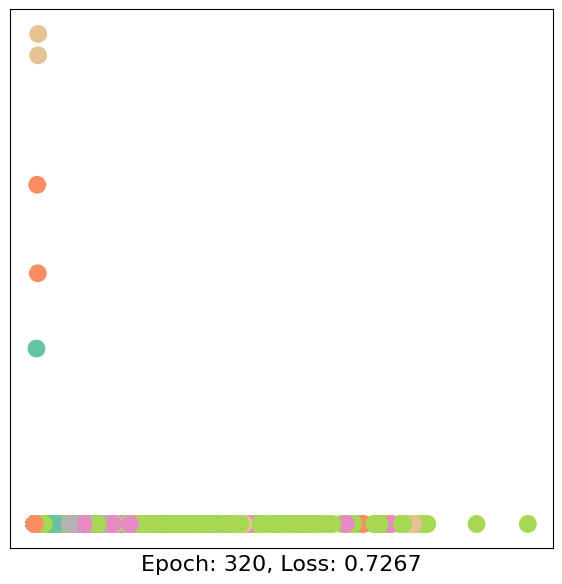

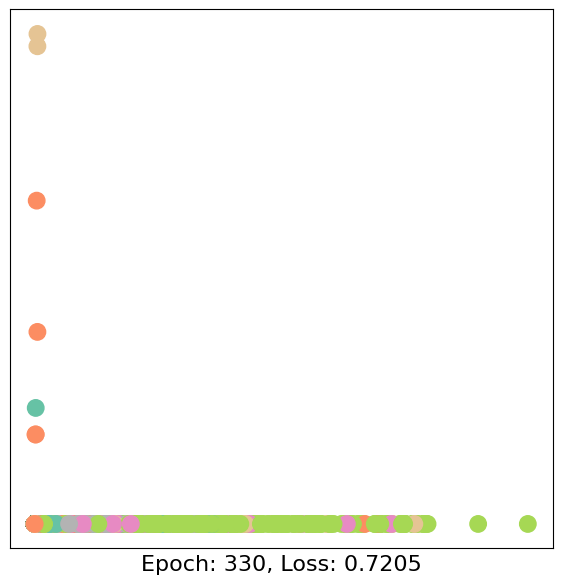

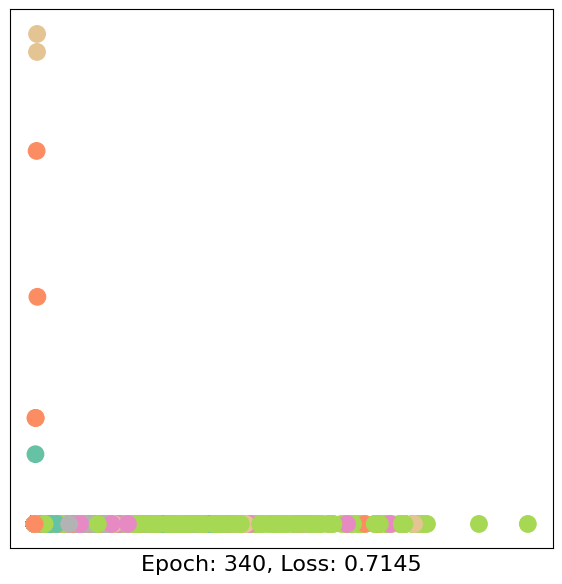

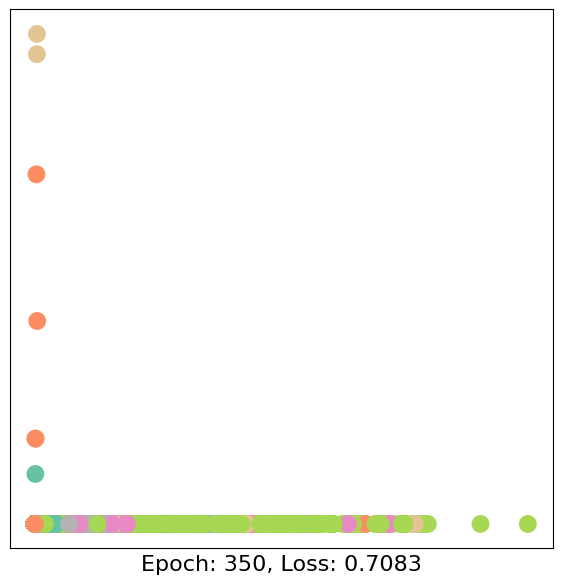

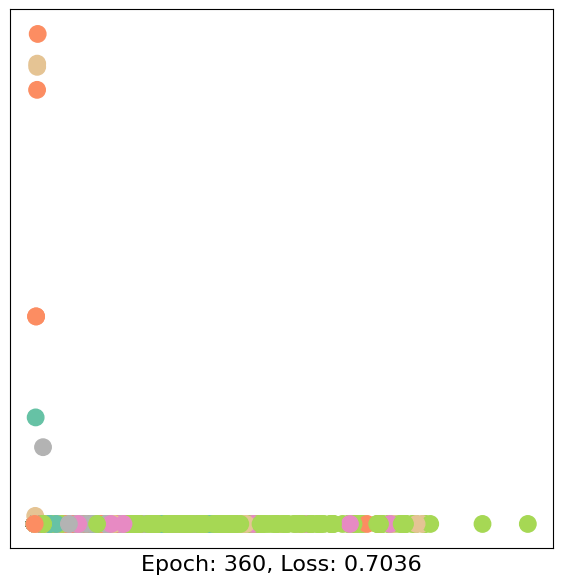

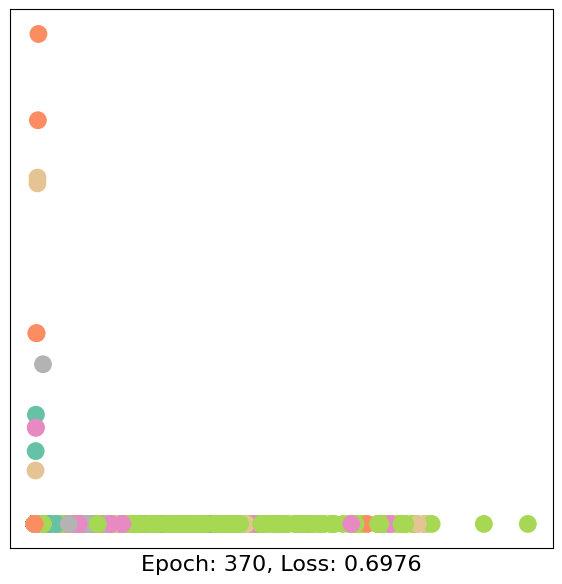

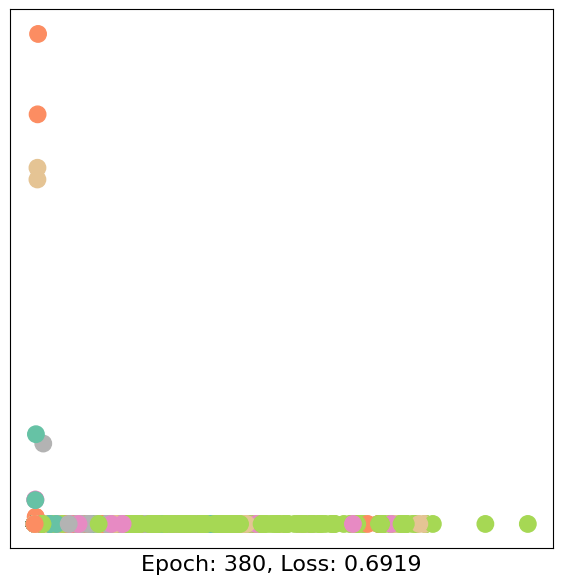

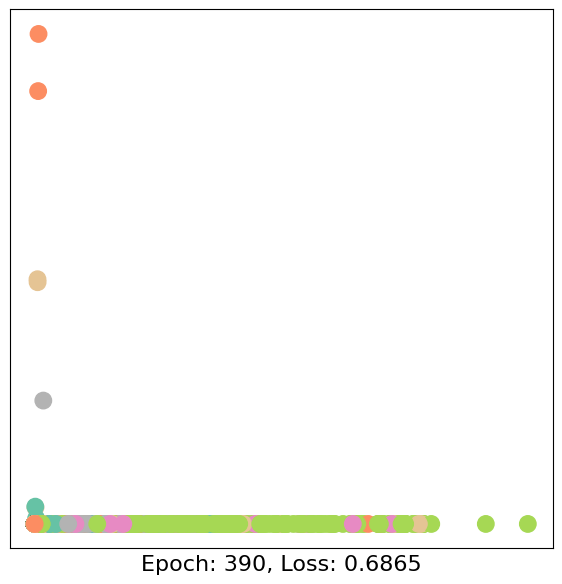

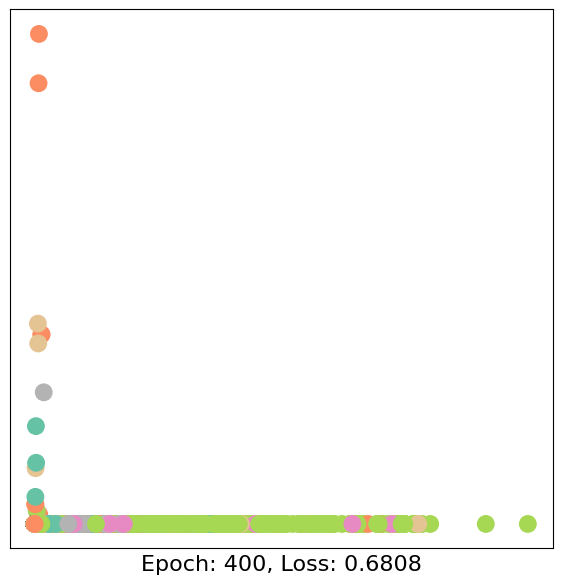

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h



@torch.no_grad()

def test(data):

    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)

    return accs



for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

#PubMed
We attempt the same procedure with a different dataset. This is where we collect our PubMed dataset which will also list the number of graphs, features and classes.

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid("", "PubMed")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: PubMed():
Number of graphs: 1
Number of features: 500
Number of classes: 3


Done!


We expand more on this by outputing the number of nodes, edges, average node degree, training node etc...

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Graphs  | # of edges  | # of Classes  |
|---|---|---|---|
| PubMed  | 19717  | 88648   | 3  |

##Visualization of our PubMed
This is now the output of our current graph.

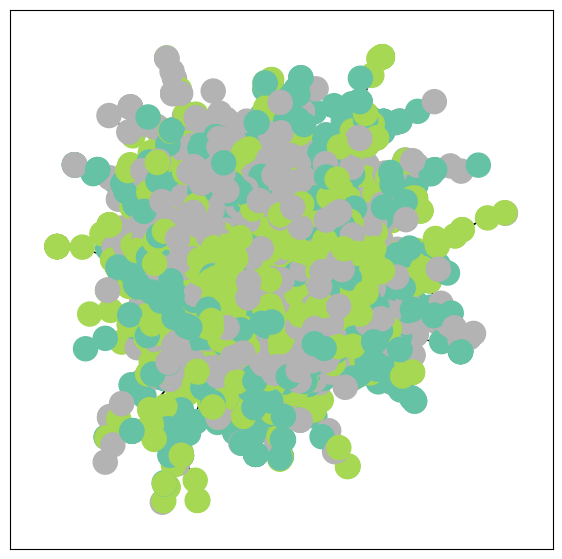

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

##GCN + Relu PubMed

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(500, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=3, bias=True)
)


##Embedding the Pubmed Network

Embedding shape: [19717, 2]


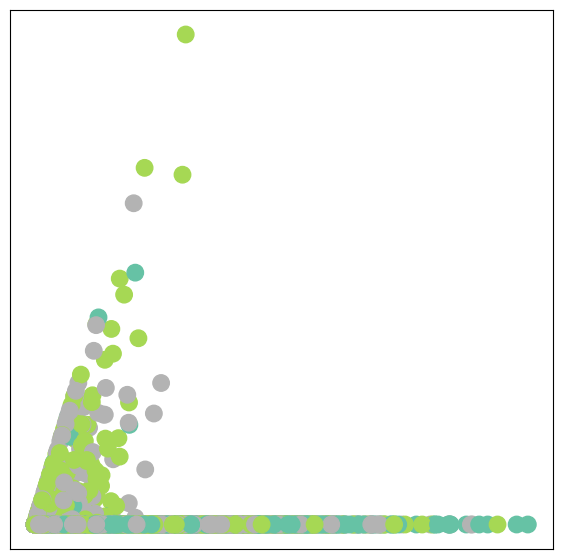

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

##Training on the PubMed Network

<IPython.core.display.Javascript object>

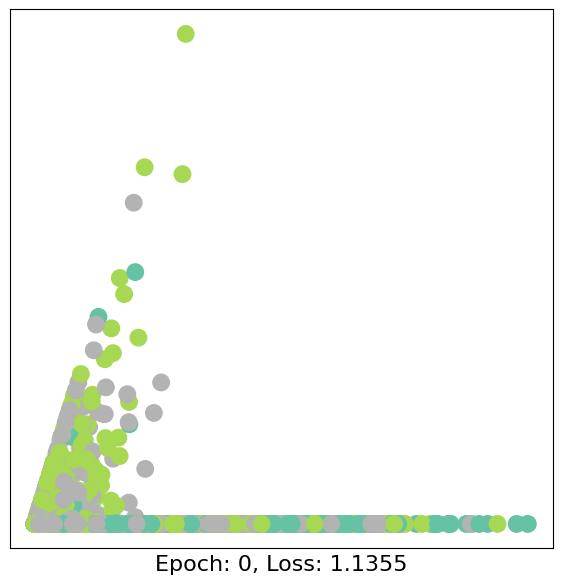

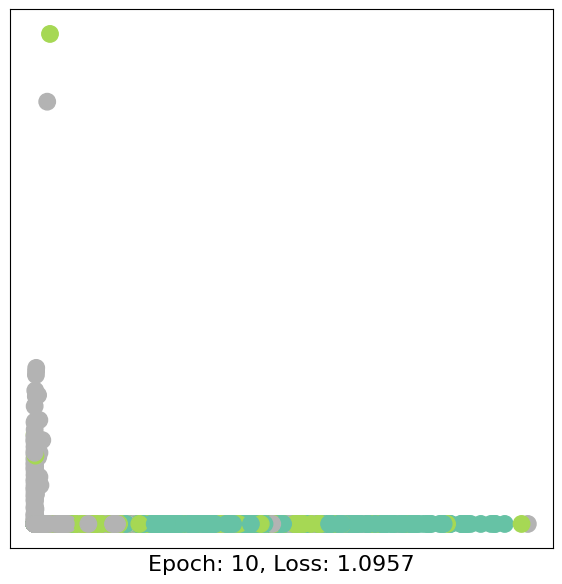

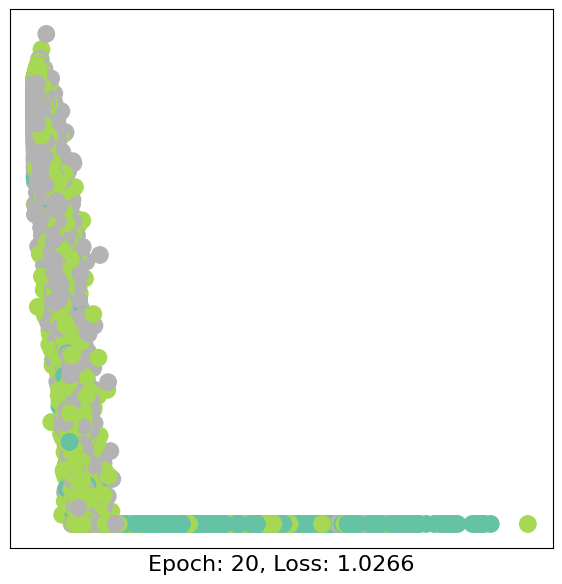

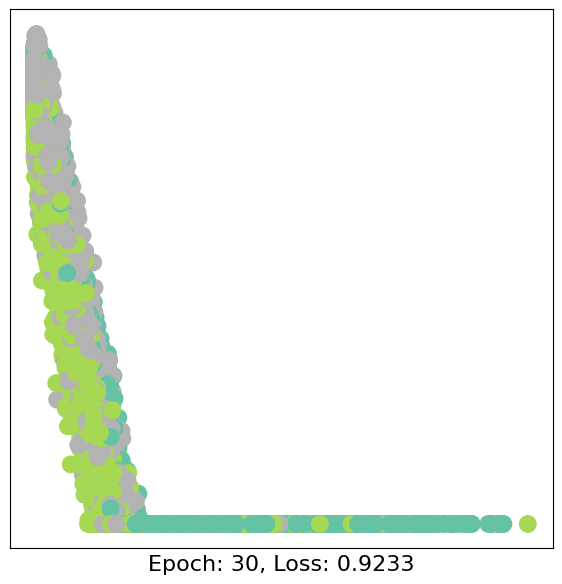

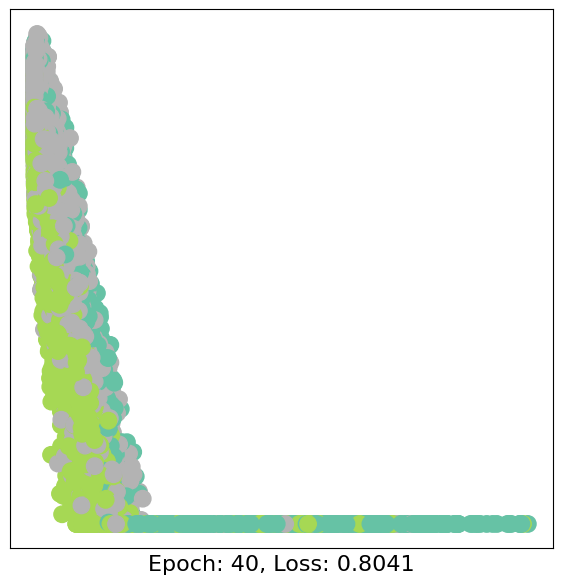

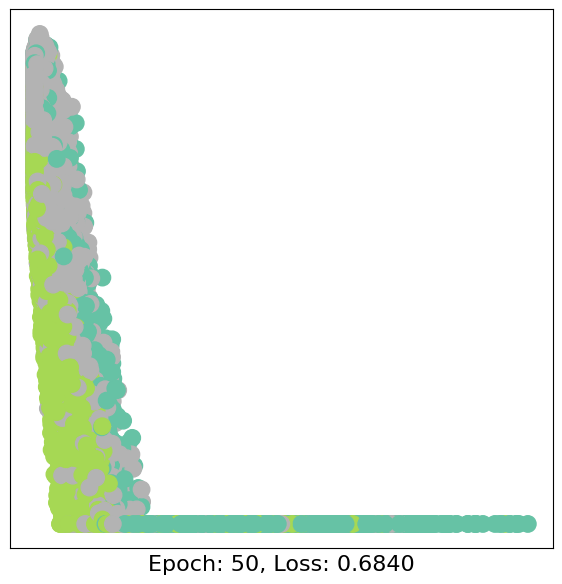

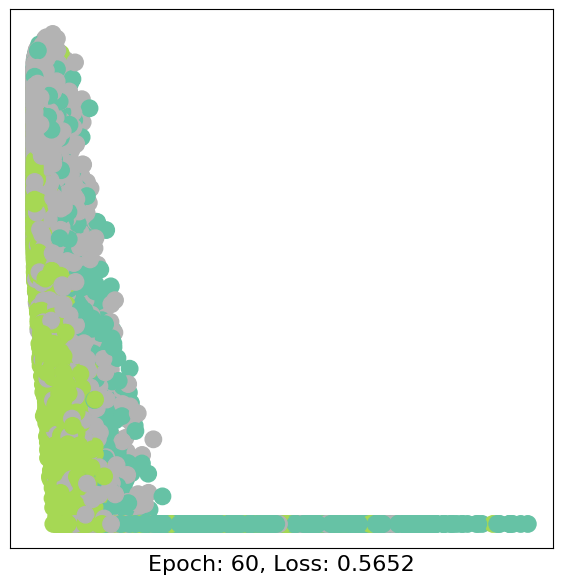

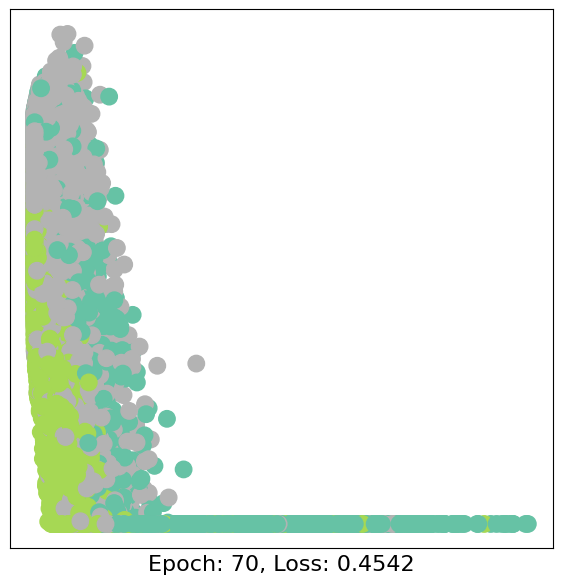

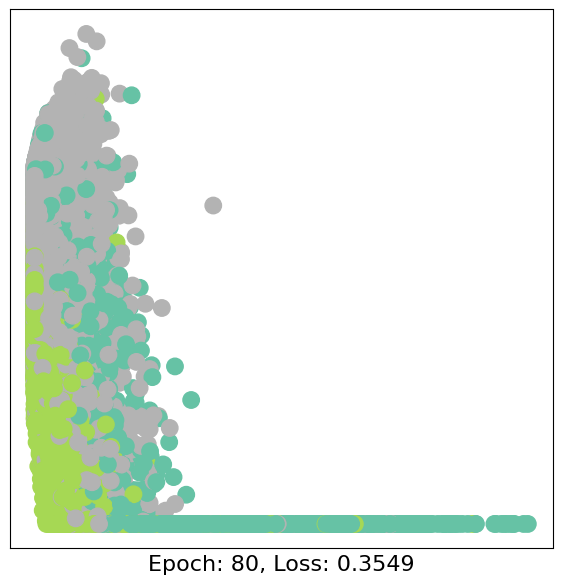

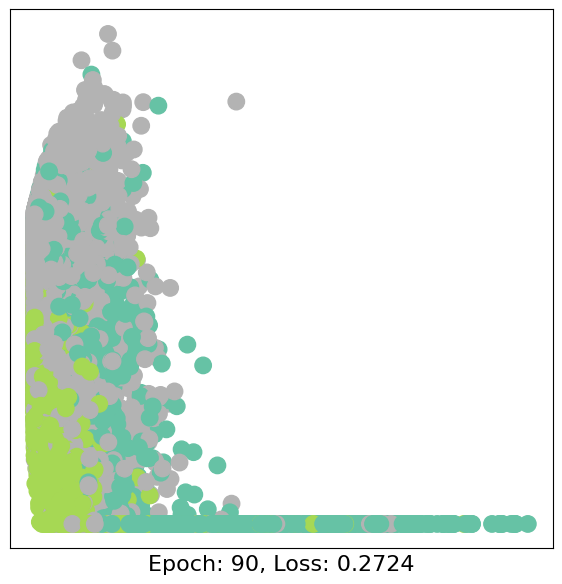

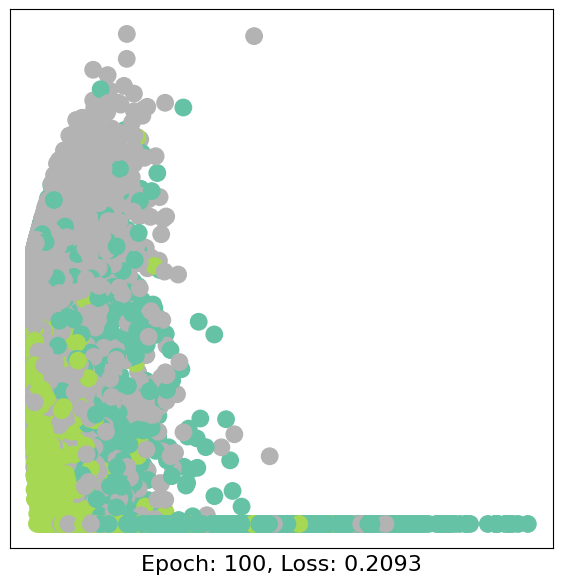

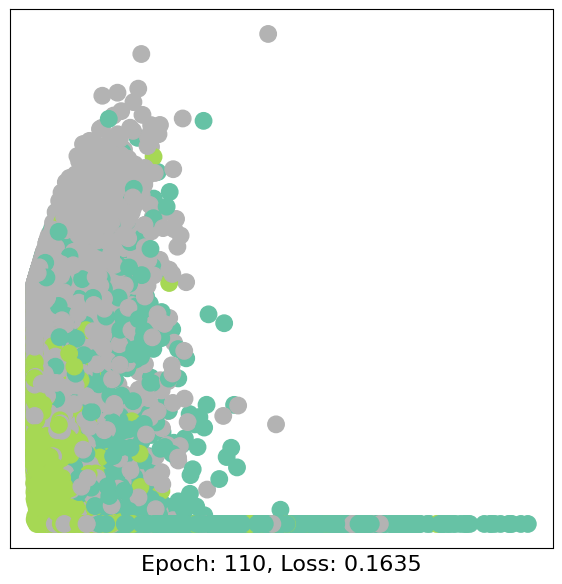

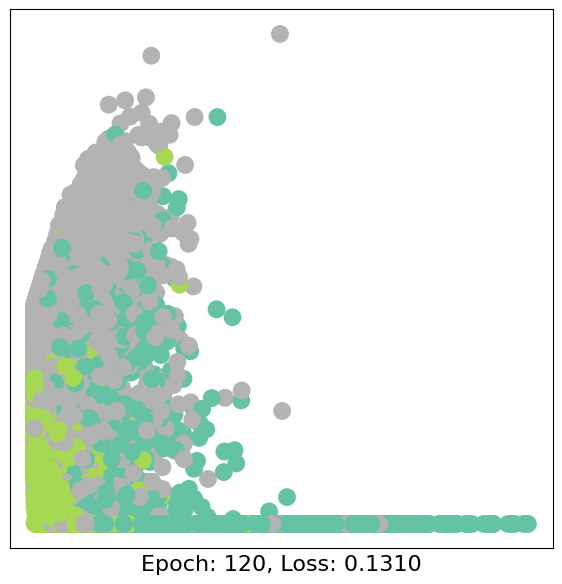

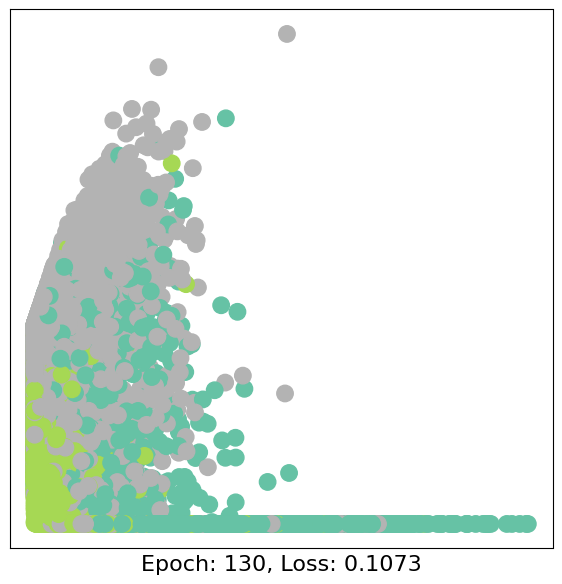

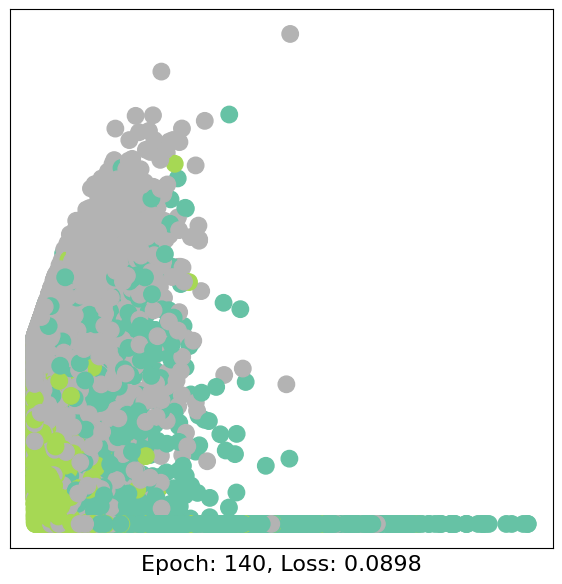

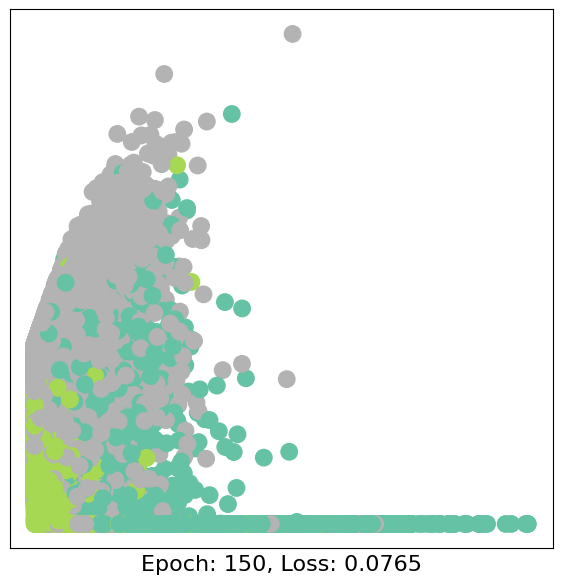

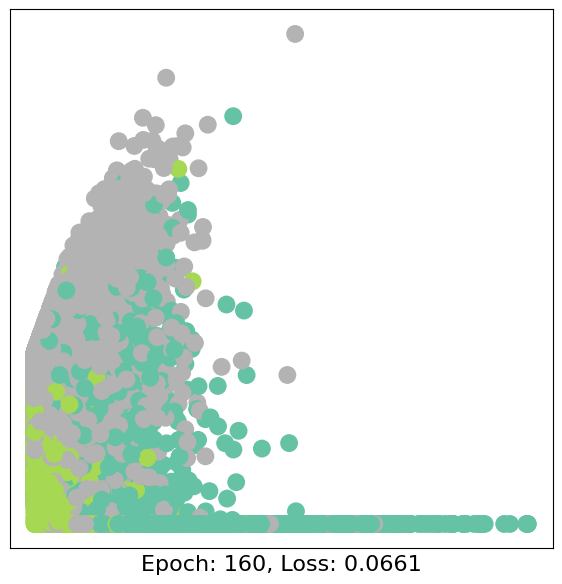

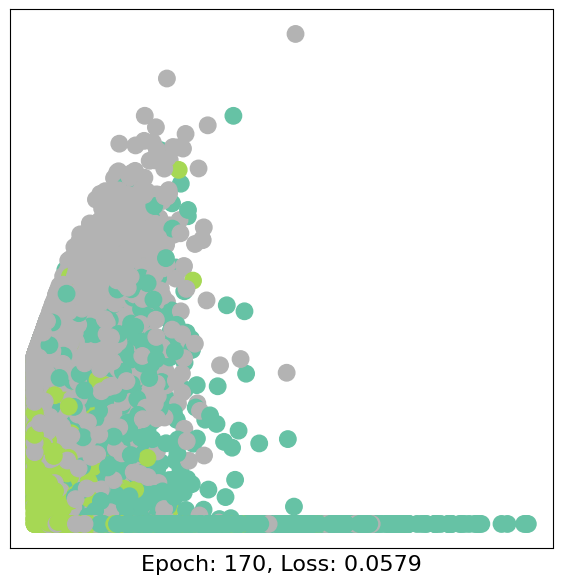

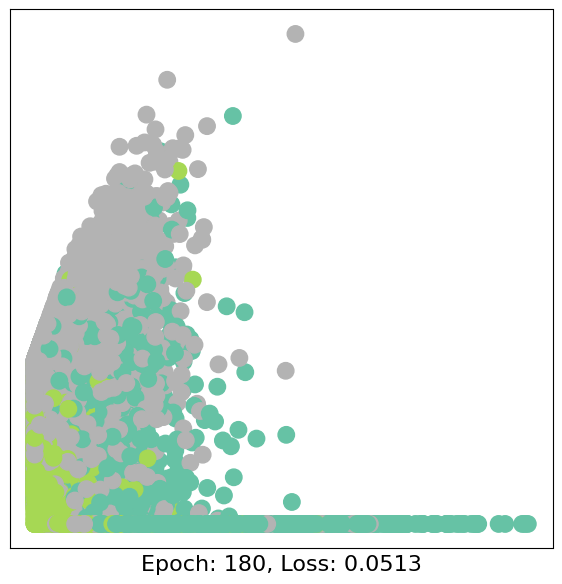

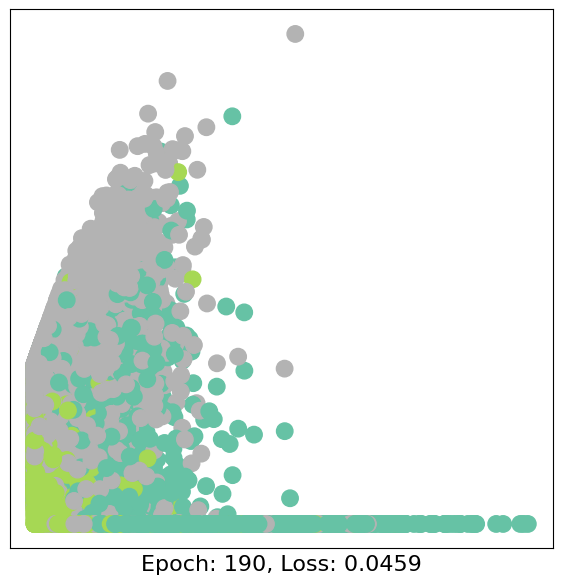

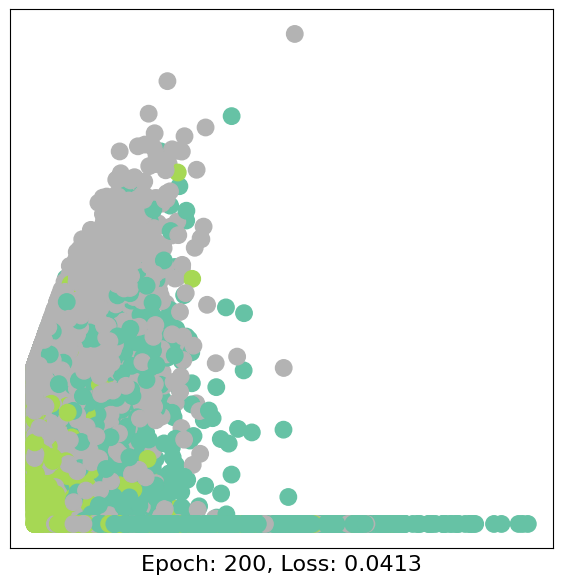

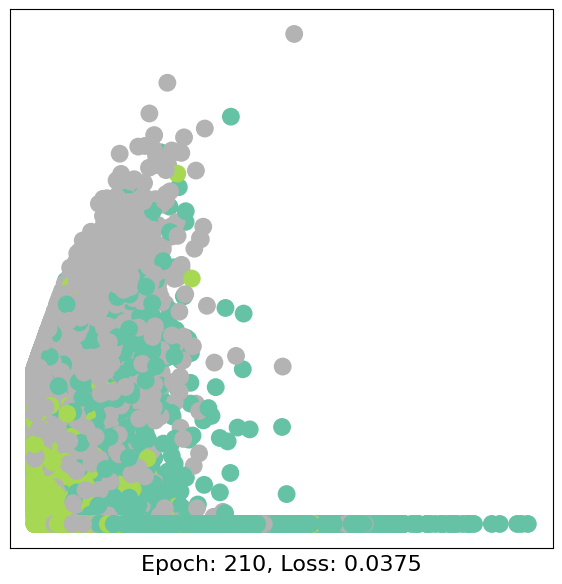

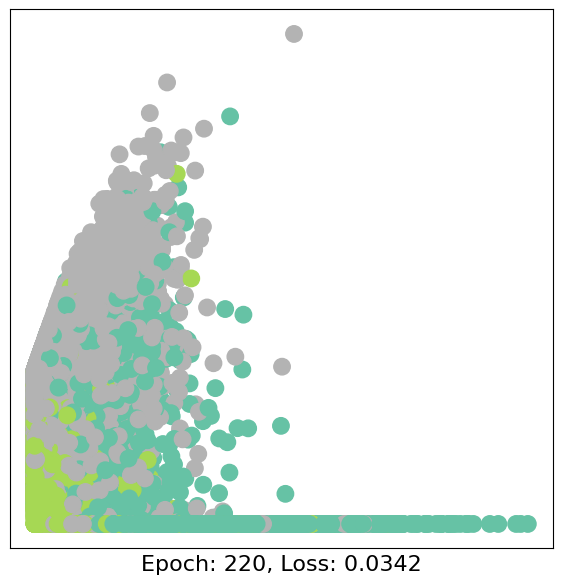

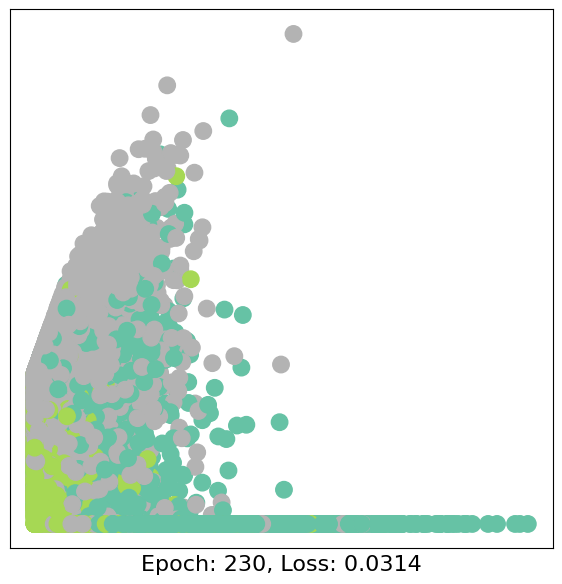

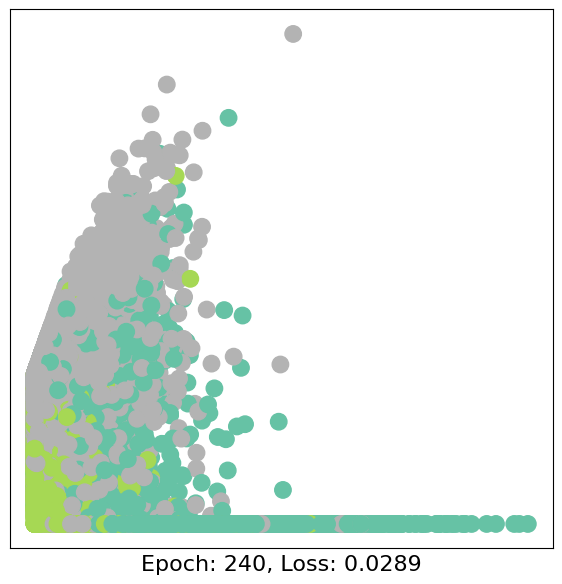

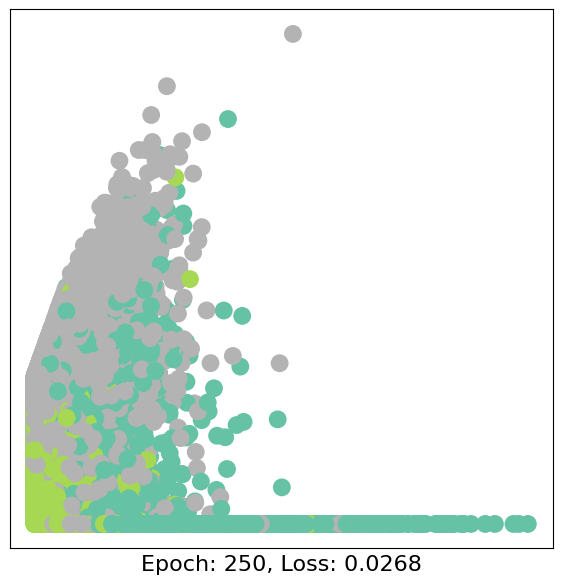

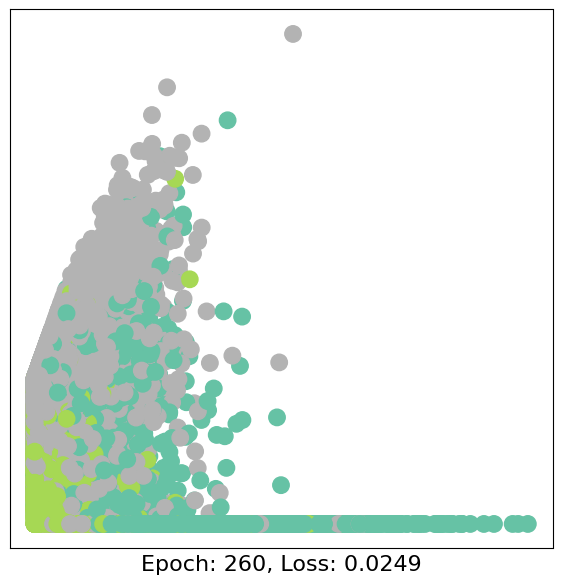

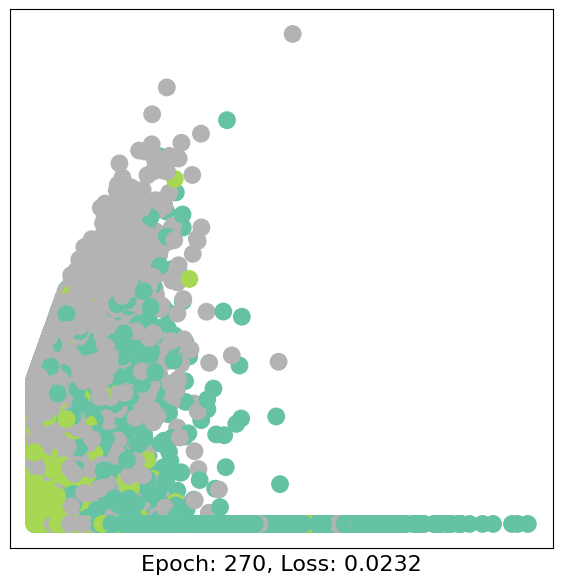

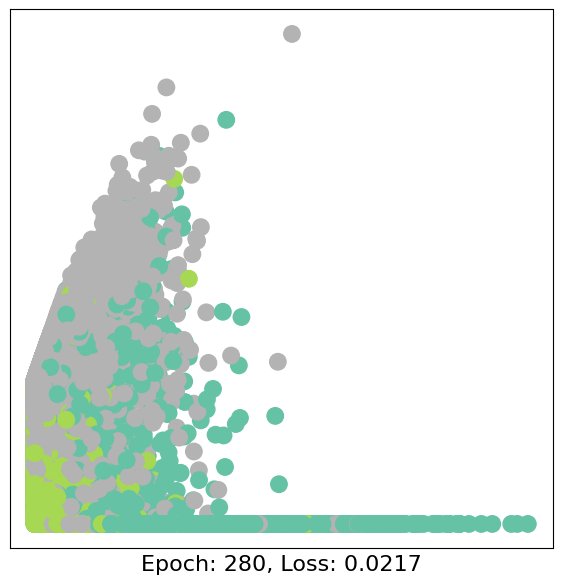

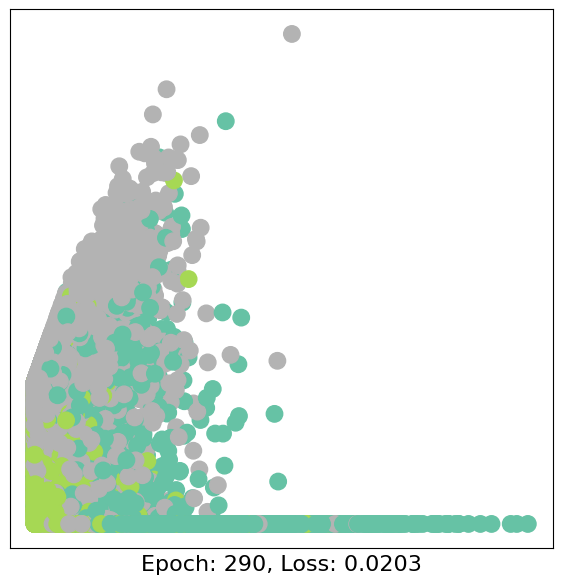

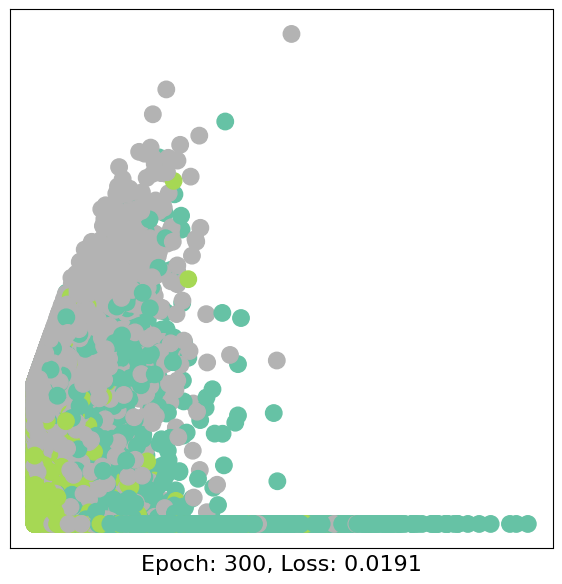

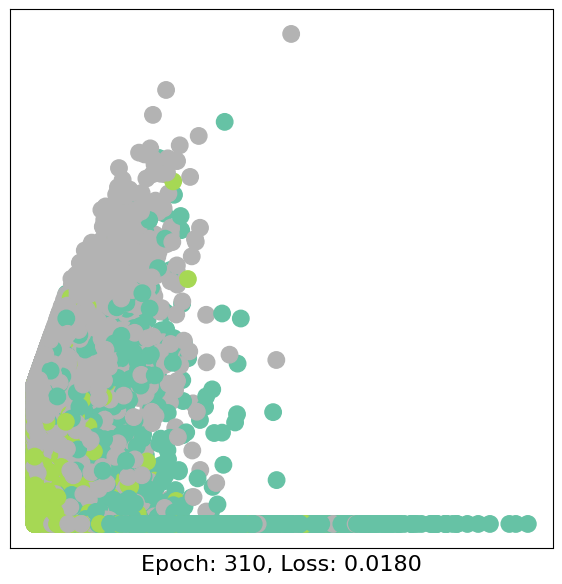

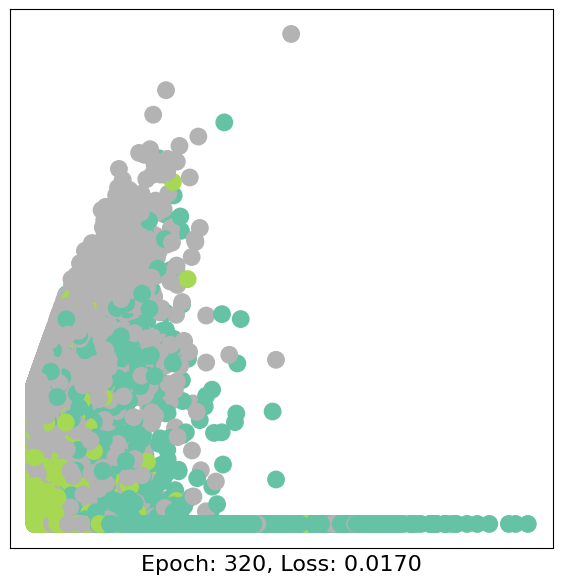

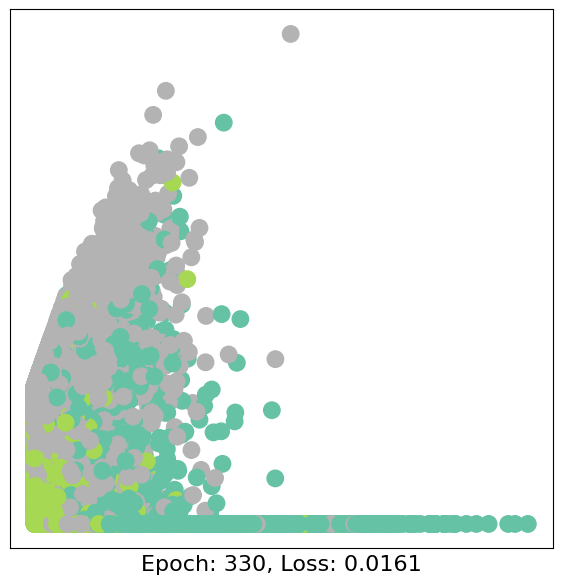

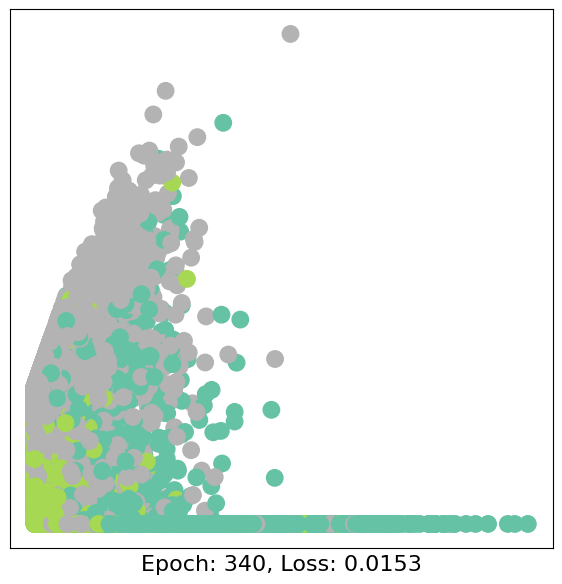

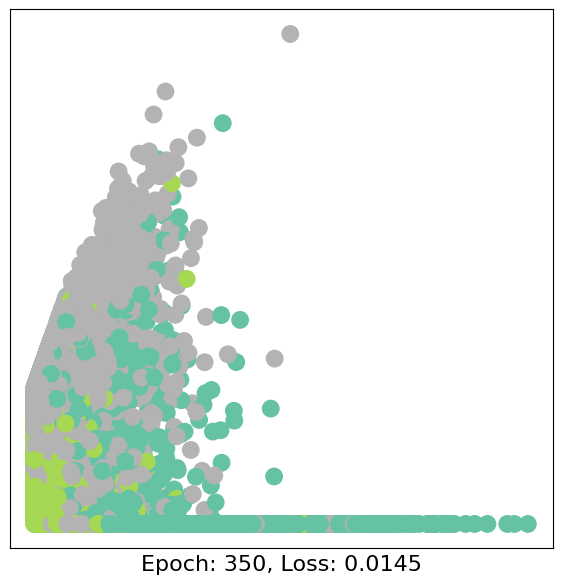

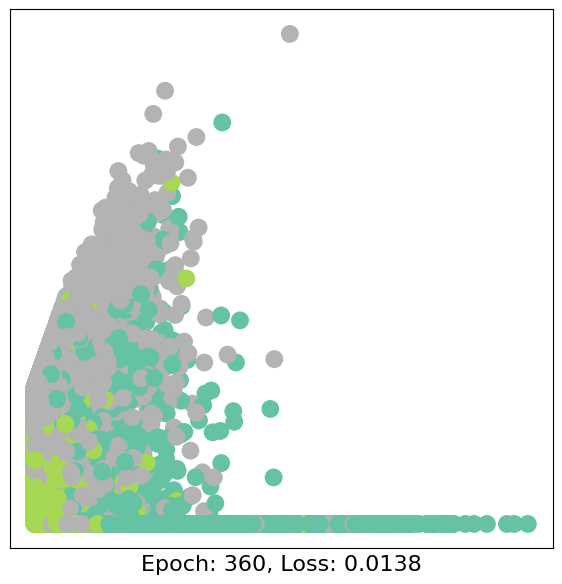

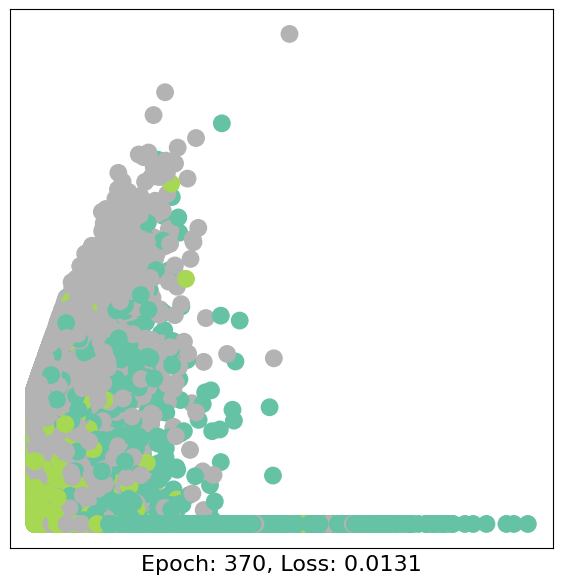

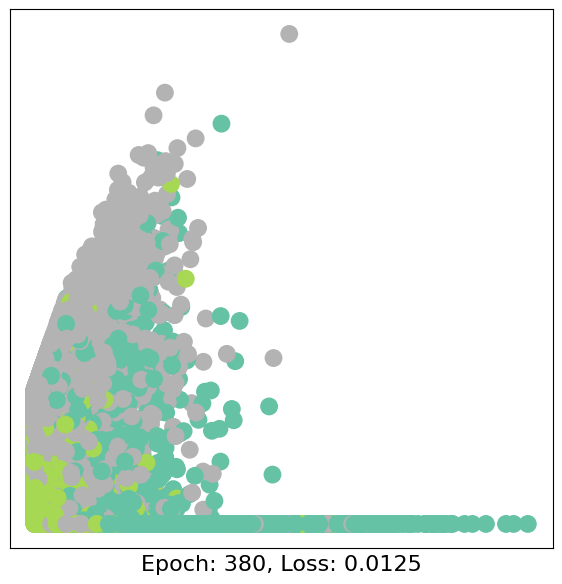

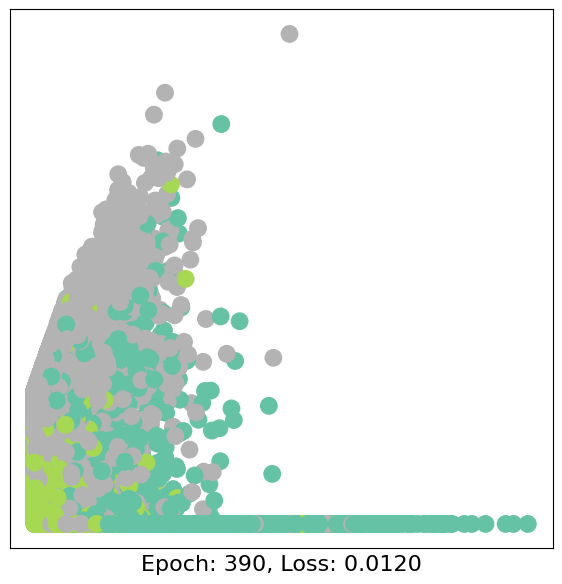

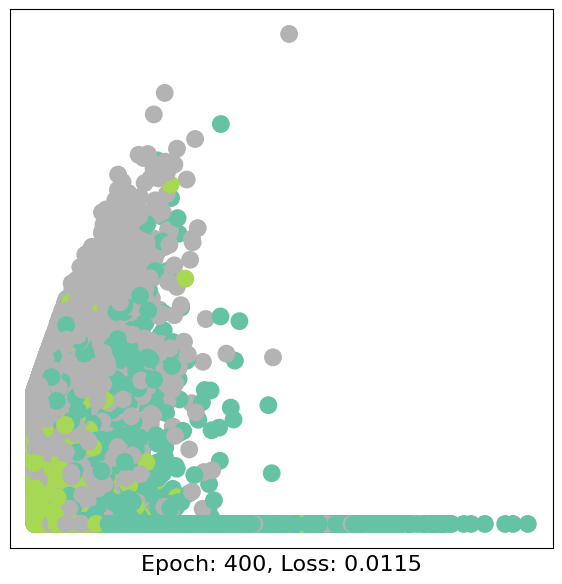

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h



@torch.no_grad()

def test(data):

    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)

    return accs



for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

#**References**

Venkatareddy, – By  Dodda. (n.d.). Graph representation - adjacency matrix and linked list. TUTORIALTPOINT. https://www.tutorialtpoint.net/2021/06/graph-representation-adjacency-matrix-linked-list.html  

Adjacency matrix. from Wolfram MathWorld. (n.d.). https://mathworld.wolfram.com/AdjacencyMatrix.html  

5.label propagation for Node Classification. velog. (n.d.). https://velog.io/@tobigsgnn1415/5.-Label-Propagation-for-Node-Classification

OpenAI. (2023). ChatGPT (Feb 13 version). https://chat.openai.com

Masui, T. (2022, October 17). Graph neural networks with PYG on node classification, link prediction, and anomaly detection. Medium. https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275

AltexSoft. (2024, March 29). Semi-supervised learning, explained. https://www.altexsoft.com/blog/semi-supervised-learning/